# 📘 Proyecto de Aula - Fundamentos en Ciencia de Datos

*"Análisis del comportamiento e identificación de patrones en el valor de las donaciones y desperdicios de alimentos de una empresa del sector cárnico mediante técnicas de ciencia de datos"*

**Objetivo**

•	Aplicar técnicas de análisis exploratorio de datos (EDA) para identificar tendencias, patrones y comportamientos significativos en el valor de las donaciones y del desperdicio de alimentos a lo largo del tiempo.

In [ ]:
# Librerías
import pandas as pd
import os

# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
from sklearn.feature_selection import mutual_info_regression
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
import matplotlib.dates as mdates
from scipy.stats import chi2_contingency
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm

In [86]:
# Leer el archivo CSV 
df = pd.read_csv("df_limpio.csv")

# **6. Análisis Exploratorio (EDA)**

El **análisis exploratorio de datos (EDA)** busca comprender la estructura y calidad del dataset mediante la identificación de patrones, relaciones y distribuciones, en este caso de las donaciones y las destrucciones. Detectando anomalías, inconsistencias y valores atípicos que requieren limpieza o transformación. Para finalmente orientar el modelado y la toma de decisiones basándose en un conocimiento sólido de los datos.


# *Análisis General*

En este apartado se analizará por medio de estadísticos, el comportamiento general del data set, para tener una primera visual de su comportamiento y principales características

In [88]:
# Calcular número total de filas
total_filas = len(df)

# Calcular conteo de valores faltantes (total)
faltantes = df.isnull().sum()

# Calcular porcentaje de valores faltantes (total)
porcentaje = (faltantes / total_filas) * 100

# Crear DataFrame resumen (total)
faltantes_df = pd.DataFrame({
    'Faltantes_total': faltantes,
    'Porcentaje_total(%)': porcentaje.round(2)
})

# Filtrar  tipo = destruccion
df_desperdicio = df[df['tipo'] == 'destruccion']
faltantes_desperdicio = df_desperdicio.isnull().sum()

# Filtrar  tipo = donaciones
df_donaciones = df[df['tipo'] == 'donacion']
faltantes_donaciones = df_donaciones.isnull().sum()

faltantes_df['Faltantes_desperdicio'] = faltantes_desperdicio
faltantes_df['Faltantes_donaciones'] = faltantes_donaciones

faltantes_df = faltantes_df[faltantes_df['Faltantes_total'] > 0].sort_values(
    by='Faltantes_total', ascending=False
)

print(faltantes_df)



                 Faltantes_total  Porcentaje_total(%)  Faltantes_desperdicio  \
of_ventas                 170271                 9.39                 165340   
subcategoria              148782                 8.20                 138004   
linea                      25216                 1.39                  25064   
marca                      22962                 1.27                  22958   
categoria                  21235                 1.17                  21233   
nombre_material              209                 0.01                    208   
planta                        74                 0.00                      5   
causales                      70                 0.00                      1   
tipo                          69                 0.00                      0   
desperdicio_kg                 5                 0.00                      5   
peso_kg                        5                 0.00                      5   

                 Faltantes_donaciones  

🔹 Observaciones importantes:

1. Las variables **of_ventas** y **subcategoria** presentan la mayor cantidad de faltantes (9.39% y 8.20%), siendo los principales problemas de calidad de datos.
2. La mayoría de los faltantes provienen del **segmento de desperdicio**, no de donaciones, lo que indica un sesgo en el registro de ese proceso, es lógico este resultado dado que la mayoría de productos son desperdiciados.
3. Variables como **planta**, **causales**, **tipo**, **desperdicio_kg** y **peso_kg** prácticamente no tienen faltantes, por lo que su calidad de datos es adecuada.


In [89]:
# Estadísticos descriptivos básicos
print("📊 Estadísticos descriptivos TOTAL:")
print(df[["cantidad", "valor", "peso_kg", "desperdicio_kg"]].describe())

# Si quieres incluir también moda y varianza:
moda = df.mode().iloc[0] # moda de cada columna
varianza = df[["cantidad", "valor", "peso_kg", "desperdicio_kg"]].var(numeric_only=True)

print("\n📊 Varianza de cada variable:")
print(varianza)

📊 Estadísticos descriptivos TOTAL:
           cantidad         valor       peso_kg  desperdicio_kg
count  1.813548e+06  1.813548e+06  1.813543e+06    1.813543e+06
mean   1.649358e+01  4.664456e+04  5.889560e-01    4.550624e+00
std    9.864843e+02  3.484671e+05  1.846021e+00    2.655132e+02
min   -8.587000e+03 -1.288050e+07  0.000000e+00   -7.620000e+03
25%    1.000000e+00  6.353000e+03  2.500000e-01    5.000000e-01
50%    2.000000e+00  1.420800e+04  4.500000e-01    1.200000e+00
75%    6.000000e+00  3.585500e+04  6.800000e-01    3.000000e+00
max    6.135690e+05  1.126992e+08  9.600000e+02    2.733360e+05

📊 Varianza de cada variable:
cantidad          9.731512e+05
valor             1.214293e+11
peso_kg           3.407794e+00
desperdicio_kg    7.049725e+04
dtype: float64


In [90]:
# Para tipo = destruccion
print("\n📊 Estadísticos descriptivos (TIPO = destruccion):")
print(df[df["tipo"] == "destruccion"][["cantidad", "valor", "peso_kg", "desperdicio_kg"]].describe())

# Varianza por tipo
varianza_desperdicio = df[df["tipo"] == "destruccion"][["cantidad", "valor", "peso_kg", "desperdicio_kg"]].var(numeric_only=True)

print("\n📊 Varianza de cada variable (TIPO = destruccion):")
print(varianza_desperdicio)



📊 Estadísticos descriptivos (TIPO = destruccion):
           cantidad         valor       peso_kg  desperdicio_kg
count  1.749681e+06  1.749681e+06  1.749676e+06    1.749676e+06
mean   1.629702e+01  4.417394e+04  5.960843e-01    4.391780e+00
std    1.004105e+03  3.361892e+05  1.877909e+00    2.701615e+02
min   -8.587000e+03 -1.288050e+07  0.000000e+00   -7.620000e+03
25%    1.000000e+00  6.384000e+03  2.500000e-01    5.000000e-01
50%    2.000000e+00  1.424700e+04  4.500000e-01    1.200000e+00
75%    6.000000e+00  3.553500e+04  6.800000e-01    3.000000e+00
max    6.135690e+05  1.126992e+08  9.600000e+02    2.733360e+05

📊 Varianza de cada variable (TIPO = destruccion):
cantidad          1.008228e+06
valor             1.130232e+11
peso_kg           3.526544e+00
desperdicio_kg    7.298725e+04
dtype: float64


In [91]:
# Para tipo = donacion
print("\n📊 Estadísticos descriptivos (TIPO = donacion):")
print(df[df["tipo"] == "donacion"][["cantidad", "valor", "peso_kg", "desperdicio_kg"]].describe())

# Varianza por tipo
varianza_desperdicio = df[df["tipo"] == "donacion"][["cantidad", "valor", "peso_kg", "desperdicio_kg"]].var(numeric_only=True)

print("\n📊 Varianza de cada variable (TIPO = donacion):")
print(varianza_desperdicio)


📊 Estadísticos descriptivos (TIPO = donacion):
           cantidad         valor       peso_kg  desperdicio_kg
count  63719.000000  6.371900e+04  63719.000000    63719.000000
mean      21.838039  1.141119e+05      0.393116        8.874144
std      110.281179  5.884463e+05      0.337332       47.542371
min        0.000000  0.000000e+00      0.000000        0.000000
25%        1.000000  4.891000e+03      0.170000        0.440000
50%        4.000000  1.305000e+04      0.300000        1.160000
75%       11.000000  5.102000e+04      0.480000        4.000000
max     5990.000000  3.691350e+07      5.240000     3337.751953

📊 Varianza de cada variable (TIPO = donacion):
cantidad          1.216194e+04
valor             3.462690e+11
peso_kg           1.137931e-01
desperdicio_kg    2.260277e+03
dtype: float64


🔹 Observaciones importantes:

📌 **1. Estadísticos descriptivos – TOTAL**

* Existen valores **negativos en cantidad, valor y desperdicio_kg**, lo cual indica errores de registro o valores anómalos que deben corregirse.
* Las variables cantidad y valor presentan **alta dispersión** (std muy grande y max extremadamente alto), lo que evidencia outliers severos.
* El peso_kg tiene una distribución más estable, pero desperdicio_kg muestra una **varianza muy elevada**, indicando datos muy heterogéneos y posiblemente inconsistentes.

---

📌 **2. Estadísticos descriptivos – TIPO = destrucción**

* Los valores son prácticamente iguales al total, lo que confirma que **la destrucción domina la base de datos** (más del 96% de los registros).
* Se mantienen los outliers negativos y las mismas distribuciones sesgadas observadas en el total.
* La varianza es ligeramente mayor en cantidad y desperdicio_kg respecto al total, lo que indica que **las mayores anomalías provienen del proceso de destrucción**, no de donación.

---

📌 **3. Estadísticos descriptivos – TIPO = donación**

* Las cantidades y pesos son **mucho más pequeños y estables**; la varianza es extremadamente menor, lo que refleja un proceso más controlado.
* No aparecen valores negativos, lo que sugiere que **la información de donaciones es más limpia y consistente** que la de destrucción.
* Aun así, existen outliers grandes en valor y desperdicio_kg, pero son mucho menos extremos que en destrucción.




Debido al anterior hallazgo, se procede a eliminar los valores negativos hallados en cantidad, valor y desperdicio_kg, ya que no es lógico dentro de la naturaleza de estas variables.

In [92]:
# Total de registros (todas las celdas)
total_celdas = df.size

# Matriz booleana: True donde hay valores negativos
negativos = (df.select_dtypes(include=[np.number]) < 0).sum()

# Cantidad total de valores negativos
total_negativos = negativos.sum().sum()

# Porcentaje respecto al total de celdas
porcentaje_negativos = (total_negativos / total_celdas) * 100

print("Total valores negativos:", total_negativos)
print("Porcentaje del total de celdas: {:.4f}%".format(porcentaje_negativos))


Total valores negativos: 741
Porcentaje del total de celdas: 0.0023%


In [93]:
# Identificar columnas numéricas
num_cols = df.select_dtypes(include=[np.number]).columns

# Filtrar filas donde todas las columnas numéricas sean >= 0
df_sin_negativos = df[(df[num_cols] >= 0).all(axis=1)].copy()

print("Filas originales:", len(df))
print("Filas después de eliminar negativas:", len(df_sin_negativos))
print("Filas eliminadas:", len(df) - len(df_sin_negativos))

Filas originales: 1813548
Filas después de eliminar negativas: 1812808
Filas eliminadas: 740


Ahora, se procede a analizar la moda en todas las variables, para saber cuál es el el valor más común y que sea lógico dentro de la naturaleza de cada variable.

In [ ]:
# Estadísticos descriptivos sin valores negativos
print("📊 Moda de todas las variables:")

for col in df_sin_negativos.columns:
    modas = df_sin_negativos[col].mode()  
    if len(modas) == 1:
        print(f"{col}: {modas.iloc[0]}")
    else:
        print(f"{col}: {list(modas)}")  


📊 Moda de todas las variables:
fecha: 2024-07-31
material: 0
cantidad: 1
motivo: v94
valor: 0
peso_kg: 0.5
desperdicio_kg: 0.5
planta: medellin
centro: nn18
of_ventas: 10
categoria: carnes frias
subcategoria: barras cortas 
linea: salchicha
marca: zenu
demanda: d. ordinaria
causales: devolucion de clientes
tipo: destruccion
nombre_material: salch. ranchera x 480 g


🔹 Observaciones importantes:

El valor que más se repite en la variable 'valor' es 0, esto se debe analizar más a profundidad y tomar decisiones, ya que un valor 0 en una donación no es representativa para el análisis. Y en el caso de material, se analiza posteriormente, ya que tampoco es lógico dentro de su concepto, sin embargo pueden haber excepciones.

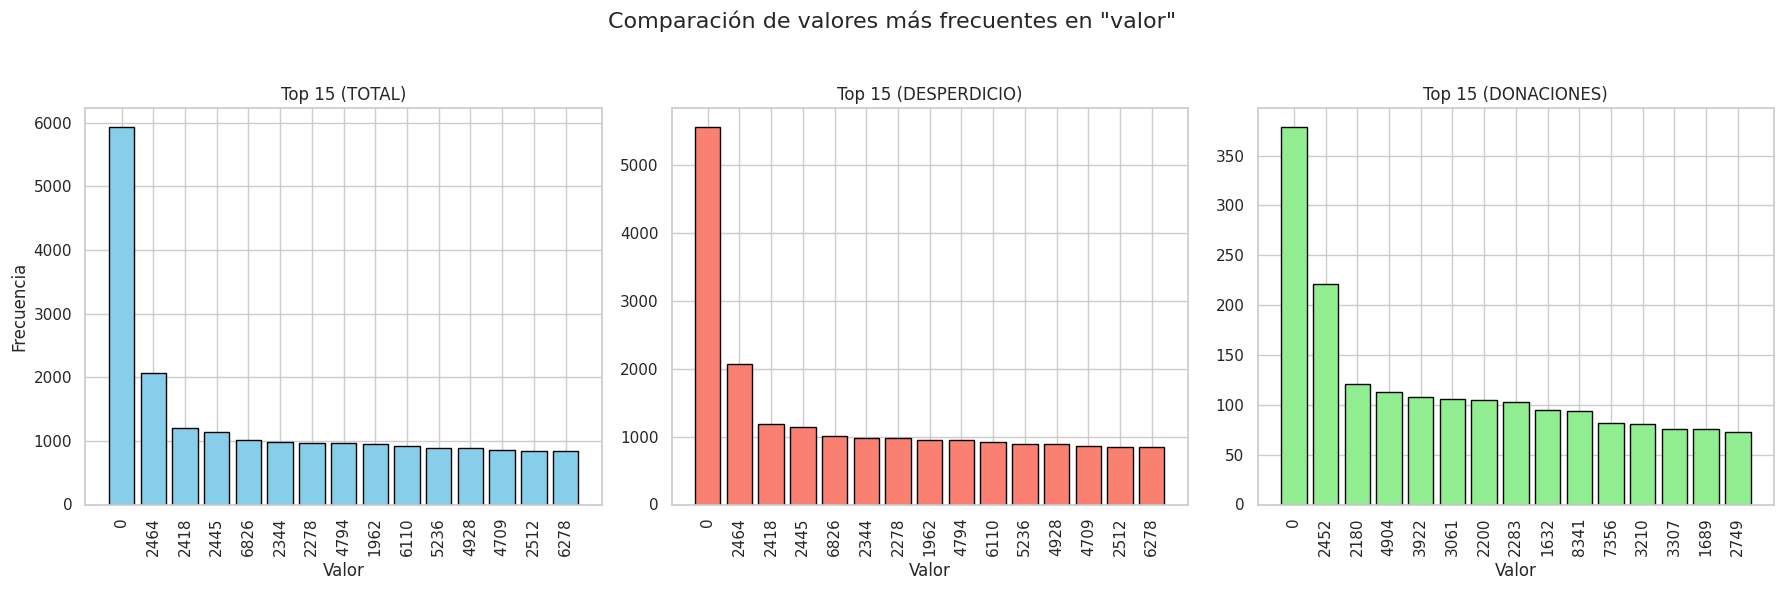

In [96]:
# Definir top N
top_n = 15

# Calcular frecuencias
top_total = df_sin_negativos['valor'].value_counts().head(top_n)
top_desperdicio = df_sin_negativos[df_sin_negativos['tipo'] == 'destruccion']['valor'].value_counts().head(top_n)
top_donaciones = df_sin_negativos[df_sin_negativos['tipo'] == 'donacion']['valor'].value_counts().head(top_n)

# Crear figura con 3 subplots en una fila
fig, axes = plt.subplots(1, 3, figsize=(18,6))
#fig, axes = plt.subplots(1, 3, figsize=(18,6), sharey=True)
# --- TOTAL ---
axes[0].bar(top_total.index.astype(str), top_total.values,
            color='skyblue', edgecolor='black')
axes[0].set_title(f'Top {top_n} (TOTAL)')
axes[0].set_xlabel('Valor')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=90)

# --- DESPERDICIO ---
axes[1].bar(top_desperdicio.index.astype(str), top_desperdicio.values,
            color='salmon', edgecolor='black')
axes[1].set_title(f'Top {top_n} (DESPERDICIO)')
axes[1].set_xlabel('Valor')
axes[1].tick_params(axis='x', rotation=90)

# --- DONACIONES ---
axes[2].bar(top_donaciones.index.astype(str), top_donaciones.values,
            color='lightgreen', edgecolor='black')
axes[2].set_title(f'Top {top_n} (DONACIONES)')
axes[2].set_xlabel('Valor')
axes[2].tick_params(axis='x', rotation=90)

# Ajustar diseño
plt.suptitle('Comparación de valores más frecuentes en "valor"', fontsize=16)
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()


In [ ]:
# Porcentaje de participación cuando valor = 0
total_filas = len(df_sin_negativos)
filas_valor_cero = len(df_sin_negativos[df_sin_negativos["valor"] == 0])

porcentaje = (filas_valor_cero / total_filas) * 100

print(f"Porcentaje de participación cuando valor = 0: {porcentaje:.2f}%")


Porcentaje de participación cuando valor = 0: 0.33%


🔹 Observaciones importantes: Con este Histograma podemos ver que el valor de donaciones 0 se encuentra en 379 registros, lo que representa un 0.33% del total del df, con lo que se puede tomar la decisión de eliminarlos, ya que no es representativo en el df y su valor no es significativo para el análisis. 

In [98]:
# Crear un nuevo DataFrame sin los valores 0 en la columna 'valor'
df_clean = df_sin_negativos[df_sin_negativos['valor'] != 0].copy()

# Revisar las primeras filas
df_clean.head()

fecha  material  cantidad motivo  valor  peso_kg  desperdicio_kg  \
0  2025-06-05   2031253         2    d19   4904     0.12           0.240   
1  2025-06-05   1075038         5    vmw  20855     0.45           2.250   
2  2025-06-05   2011706         2    vmu   4810     0.24           0.482   
3  2025-06-06   1079335         4    vd5  67884     0.50           2.000   
4  2025-06-06   1000571        14    vc6  27874     0.25           3.500   

     planta centro of_ventas             categoria          subcategoria  \
0  medellin   nn47        10  alimentos larga vida                   NaN   
1  medellin   nn20        10          carnes frias                   NaN   
2  comprado   nn91        16  alimentos larga vida  larga vida vegetales   
3  envigado   nn21        12        carnes frescas                   NaN   
4  medellin   nn21        12          carnes frias               tajados   

             linea     marca       demanda                causales  \
0             atun      zenu  d. ordinaria     averia en operacion   
1        mortadela     cunit  d. ordinaria           baja rotacion   
2  maiz larga vida      zenu  lv ordinaria  devolucion de clientes   
3            cerdo  ranchera  d. ordinaria     averia en operacion   
4        mortadela      zenu  d. ordinaria        perdida de vacio   

          tipo                           nombre_material  
0     donacion  lomos atun zenu en aceite girasol x 120g  
1     donacion   mortadela rapiya precocida cunit x 450g  
2     donacion                   maiz dulce zenu x 241 g  
3  destruccion  picada mixta lomo y tocino ranchera 500g  
4  destruccion                 mtdela. zenu pll. x 250 g

# *Análisis Univariado Continuas*

Esta sección se enfoca en analizar las variables continuas de forma unificada, para ahondar en los resultados encontrados anteriormente.

**Medidas de tendencia central**

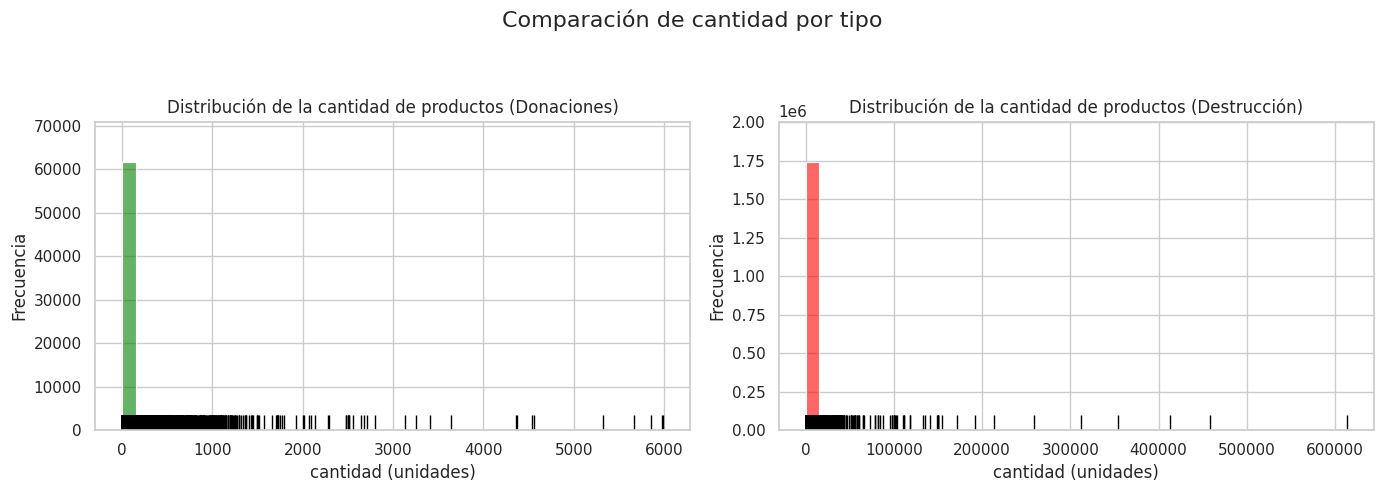

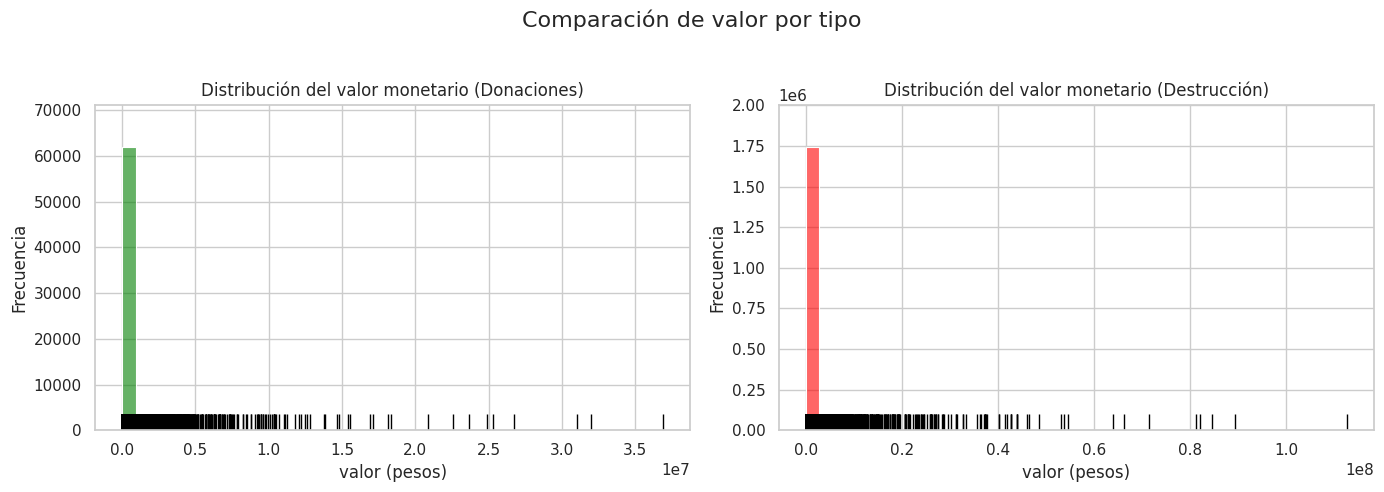

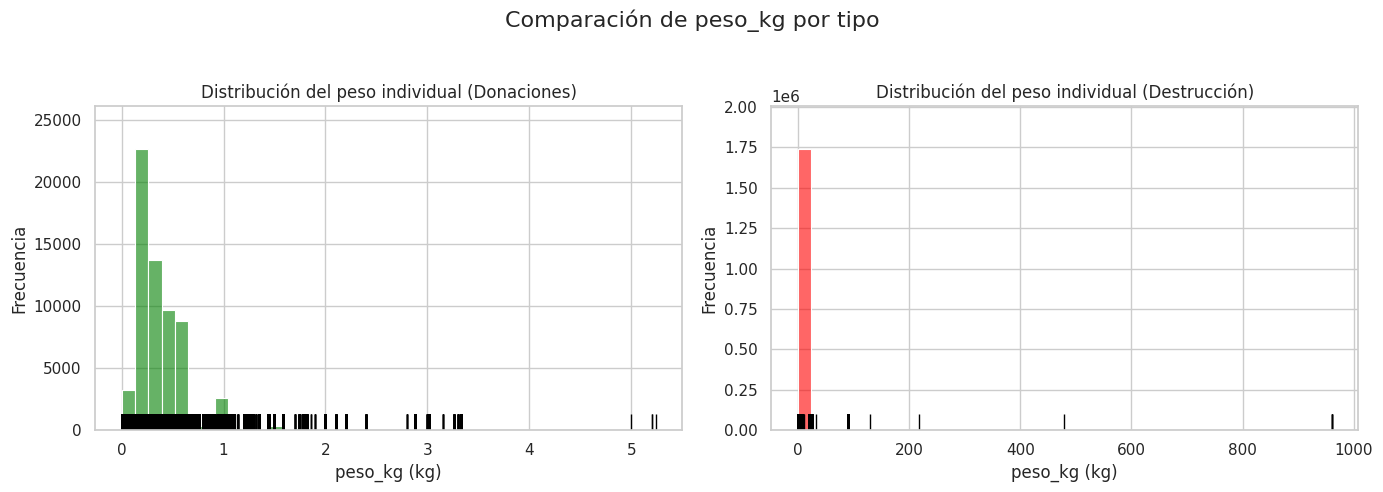

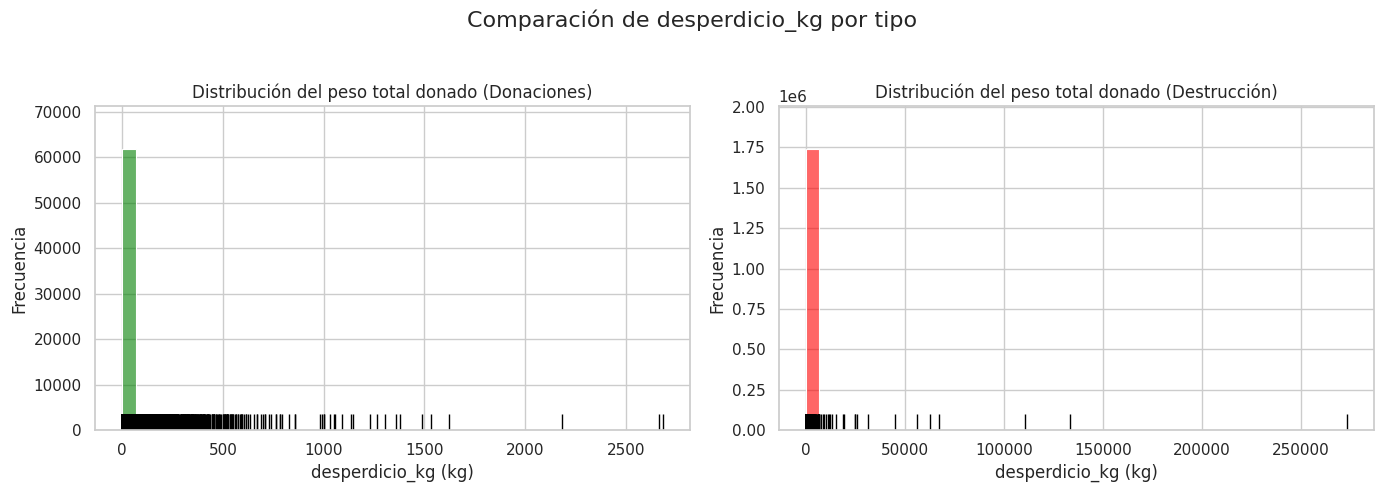

In [99]:
# Lista de variables continuas y sus unidades
variables = [
    ("cantidad", "unidades"),
    ("valor", "pesos"),
    ("peso_kg", "kg"),
    ("desperdicio_kg", "kg")
]

# Títulos descriptivos
titulos = {
    "cantidad": "Distribución de la cantidad de productos",
    "valor": "Distribución del valor monetario",
    "peso_kg": "Distribución del peso individual",
    "desperdicio_kg": "Distribución del peso total donado"
}

# Iterar sobre cada variable
for columna, unidad in variables:
    if columna not in df_clean.columns:
        continue

    # Crear figura con dos columnas (donaciones y destruccion)
    fig, axes = plt.subplots(1, 2, figsize=(14,5))

    # --- DONACIONES ---
    sns.histplot(
        df_clean[df_clean["tipo"]=="donacion"][columna],
        bins=40, color="green", alpha=0.6, ax=axes[0]
    )
    sns.rugplot(
        df_clean[df_clean["tipo"]=="donacion"][columna],
        color="black", height=0.05, ax=axes[0]
    )
    axes[0].set_title(f"{titulos[columna]} (Donaciones)")
    axes[0].set_xlabel(f"{columna} ({unidad})")
    axes[0].set_ylabel("Frecuencia")

    # --- DESPERDICIO ---
    sns.histplot(
        df_clean[df_clean["tipo"]=="destruccion"][columna],
        bins=40, color="red", alpha=0.6, ax=axes[1]
    )
    sns.rugplot(
        df_clean[df_clean["tipo"]=="destruccion"][columna],
        color="black", height=0.05, ax=axes[1]
    )
    axes[1].set_title(f"{titulos[columna]} (Destrucción)")
    axes[1].set_xlabel(f"{columna} ({unidad})")
    axes[1].set_ylabel("Frecuencia")

    plt.suptitle(f"Comparación de {columna} por tipo", fontsize=16)
    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()


🔹 Observaciones importantes: 


Como se pudo observar en el análisis general, aquí se puede afirmar lo sesgado que están las variables y siendo en la categoría de destrucción la que cuenta con una variabilidad más alta, que puede estar relacionado por que presenta la gran mayoría de datos, en comparación con las donaciones.


📌 VARIABLE: CANTIDAD

🔹 Donación:
   Media:   21.58 unidades
   Mediana: 4.00 unidades
   Moda:    1.00 unidades

🔹 Destrucción:
   Media:   16.12 unidades
   Mediana: 2.00 unidades
   Moda:    1.00 unidades


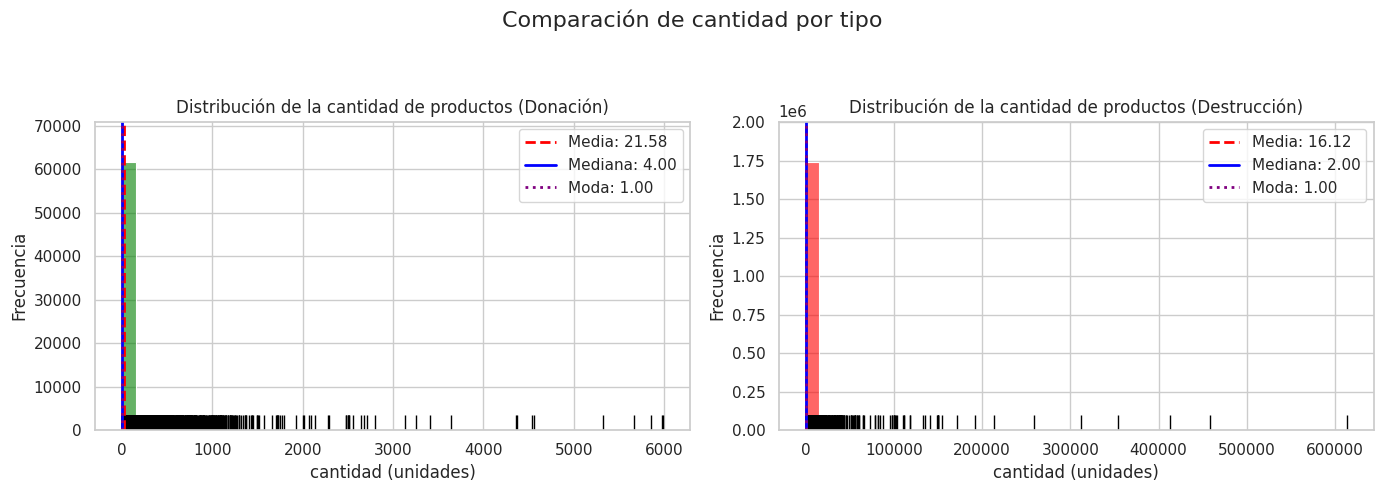


📌 VARIABLE: VALOR

🔹 Donación:
   Media:   114794.71 pesos
   Mediana: 13200.00 pesos
   Moda:    2452.00 pesos

🔹 Destrucción:
   Media:   44323.37 pesos
   Mediana: 14326.00 pesos
   Moda:    2464.00 pesos


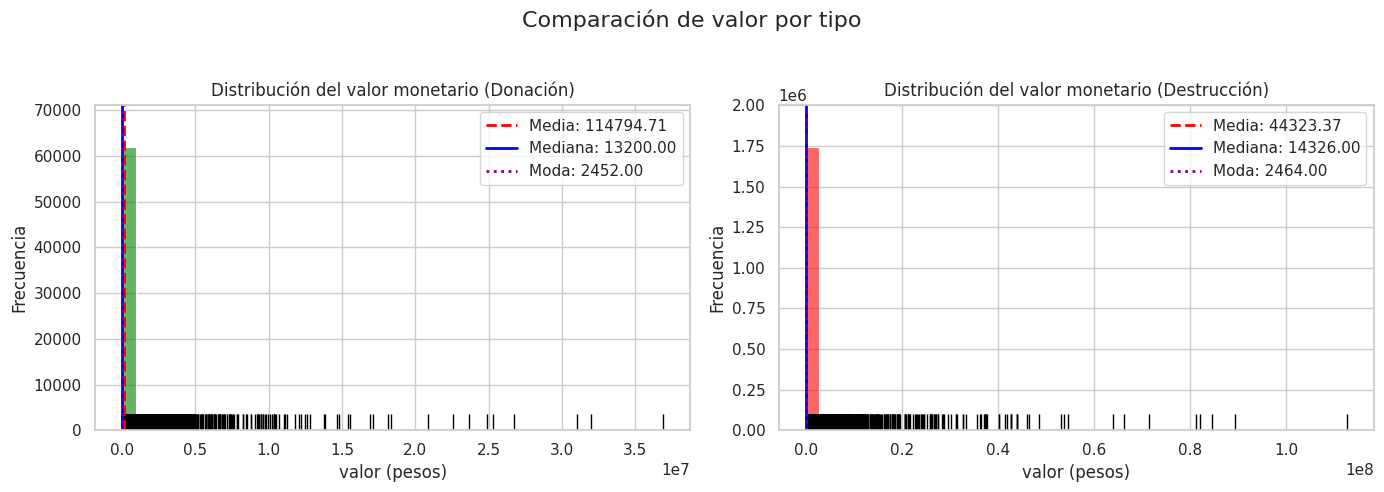


📌 VARIABLE: PESO_KG

🔹 Donación:
   Media:   0.38 kg
   Mediana: 0.30 kg
   Moda:    0.30 kg

🔹 Destrucción:
   Media:   0.59 kg
   Mediana: 0.45 kg
   Moda:    0.50 kg


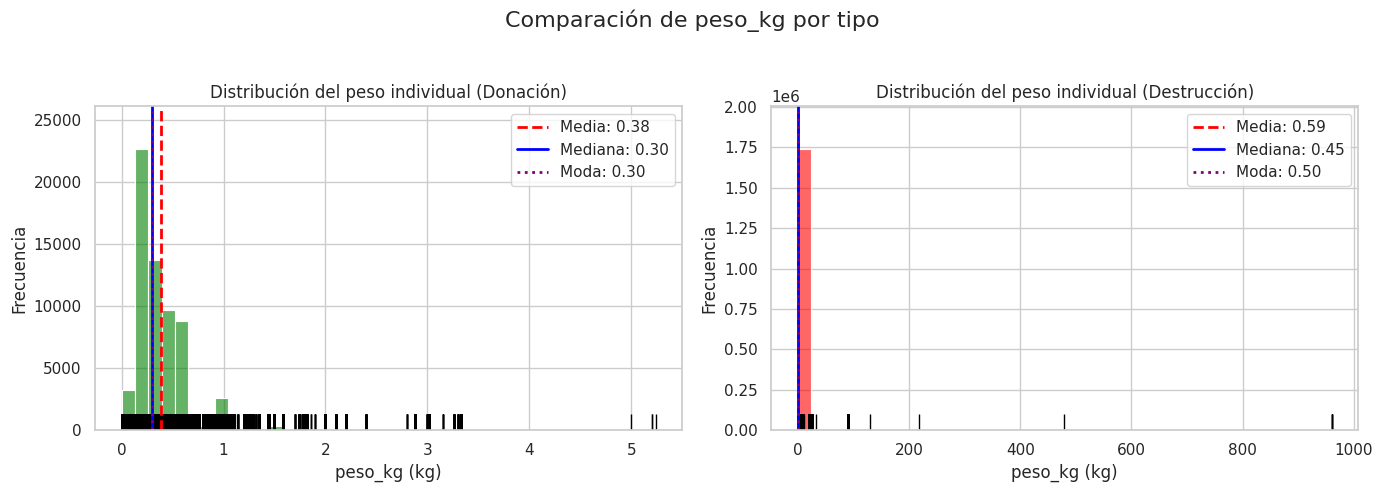


📌 VARIABLE: DESPERDICIO_KG

🔹 Donación:
   Media:   8.33 kg
   Mediana: 1.16 kg
   Moda:    0.30 kg

🔹 Destrucción:
   Media:   4.20 kg
   Mediana: 1.20 kg
   Moda:    0.50 kg


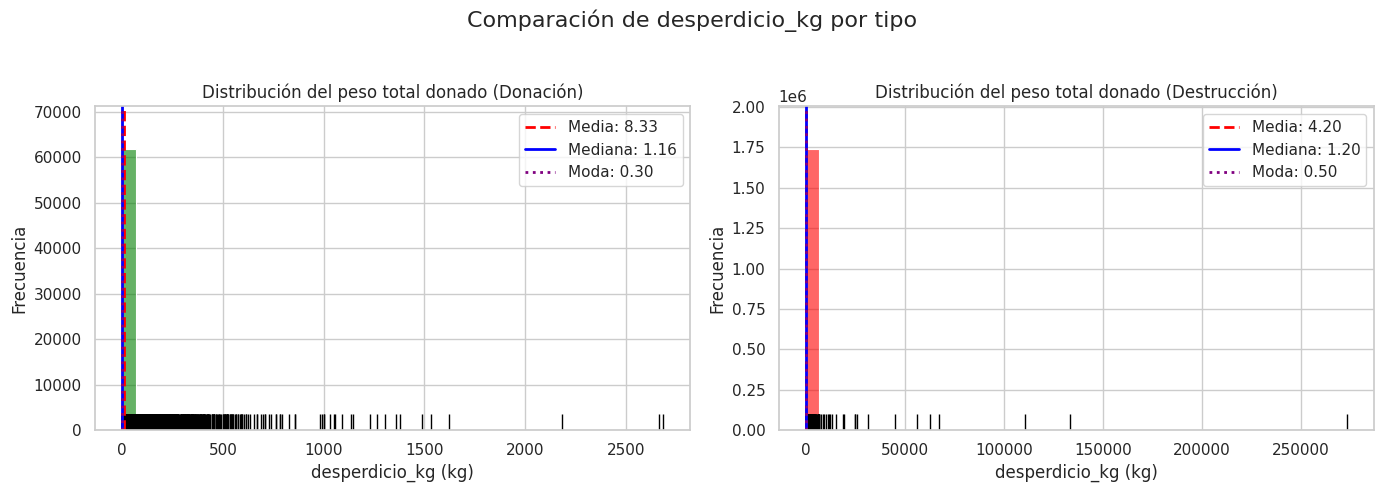

In [100]:
# Lista de variables continuas y sus unidades
variables = [
    ("cantidad", "unidades"),
    ("valor", "pesos"),
    ("peso_kg", "kg"),
    ("desperdicio_kg", "kg")
]

# Títulos descriptivos
titulos = {
    "cantidad": "Distribución de la cantidad de productos",
    "valor": "Distribución del valor monetario",
    "peso_kg": "Distribución del peso individual",
    "desperdicio_kg": "Distribución del peso total donado"
}

# Iterar sobre cada variable
for columna, unidad in variables:

    if columna not in df_clean.columns:
        print(f"⚠️ La variable '{columna}' no existe en el DataFrame.")
        continue

    print(f"\n📌 VARIABLE: {columna.upper()}")

    # ==============================
    # 1. MEDIDAS DE TENDENCIA CENTRAL
    # ==============================

    # Donación
    data_don = df_clean[df_clean["tipo"] == "donacion"][columna].dropna()
    media_don = data_don.mean()
    mediana_don = np.median(data_don)
    moda_don = stats.mode(data_don, keepdims=True)[0][0]

    # Destrucción
    data_des = df_clean[df_clean["tipo"] == "destruccion"][columna].dropna()
    media_des = data_des.mean()
    mediana_des = np.median(data_des)
    moda_des = stats.mode(data_des, keepdims=True)[0][0]

    # Mostrar resultados
    print("\n🔹 Donación:")
    print(f"   Media:   {media_don:.2f} {unidad}")
    print(f"   Mediana: {mediana_don:.2f} {unidad}")
    print(f"   Moda:    {moda_don:.2f} {unidad}")

    print("\n🔹 Destrucción:")
    print(f"   Media:   {media_des:.2f} {unidad}")
    print(f"   Mediana: {mediana_des:.2f} {unidad}")
    print(f"   Moda:    {moda_des:.2f} {unidad}")

    # ==============================
    # 2. GRÁFICOS COMPARATIVOS
    # ==============================

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # ---- DONACIÓN ----
    sns.histplot(data_don, bins=40, color="green", alpha=0.6, ax=axes[0])
    sns.rugplot(data_don, color="black", height=0.05, ax=axes[0])

    axes[0].axvline(media_don, color='red', linestyle='--', linewidth=2, label=f'Media: {media_don:.2f}')
    axes[0].axvline(mediana_don, color='blue', linestyle='-', linewidth=2, label=f'Mediana: {mediana_don:.2f}')
    axes[0].axvline(moda_don, color='purple', linestyle=':', linewidth=2, label=f'Moda: {moda_don:.2f}')

    axes[0].set_title(f"{titulos[columna]} (Donación)")
    axes[0].set_xlabel(f"{columna} ({unidad})")
    axes[0].set_ylabel("Frecuencia")
    axes[0].legend()

    # ---- DESTRUCCIÓN ----
    sns.histplot(data_des, bins=40, color="red", alpha=0.6, ax=axes[1])
    sns.rugplot(data_des, color="black", height=0.05, ax=axes[1])

    axes[1].axvline(media_des, color='red', linestyle='--', linewidth=2, label=f'Media: {media_des:.2f}')
    axes[1].axvline(mediana_des, color='blue', linestyle='-', linewidth=2, label=f'Mediana: {mediana_des:.2f}')
    axes[1].axvline(moda_des, color='purple', linestyle=':', linewidth=2, label=f'Moda: {moda_des:.2f}')

    axes[1].set_title(f"{titulos[columna]} (Destrucción)")
    axes[1].set_xlabel(f"{columna} ({unidad})")
    axes[1].set_ylabel("Frecuencia")
    axes[1].legend()

    plt.suptitle(f"Comparación de {columna} por tipo", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


🔹 Observaciones importantes:

En las gráficas de cantidad, valor y donacion_kg, confirman en sesgo que tienen y la necesidad de hacer una transfromación. Este comportamiento es lógico, ya que se presenta una alta concentración de valores de donación muy pequeñas, es decir, que es poco probable que hayan donaciones con valores muy altos, pero pueden existir, y por consecuencia, el peso debería tener este mismo comportamiento. En cuanto a las cantidades de las donaciones, se evidencia que es más común donar pocas cantidades que altas. Y por su parte en el peso individual se evidencia un comportamiento diferente, ya que se mide el peso de cada producto donado, en dónde un peso muy bajo tiene la mayor cantidad de participación, entre 0 y 1 kg, es por esto que la distribución se evidencia con una cola hacia la derecha, dónde es menos frecuente donar productos con pesos muy altos.

# *Análisis Univariado Discretas*

Esta sección se enfoca en analizar las variables discretas de forma unificada, para ahondar en los resultados encontrados anteriormente.

# Limpieza

En primer lugar, se organizan las categorías que se encuentren duplicadas o escritas diferente, para estandarizar todas las variables discretas.

In [101]:
# Mostrar valores únicos de múltiples columnas y realizar reemplazos limpios

# --- Limpieza de datos ---
df_clean['planta'] = df_clean['planta'].replace({'medellín': 'medellin'})
df_clean['of_ventas'] = df_clean['of_ventas'].replace({'00': '0'})

# --- Columnas de interés ---
columnas = [
    'motivo', 'planta', 'centro', 'of_ventas', 
    'categoria', 'subcategoria', 'linea', 
    'marca', 'demanda', 'causales'
]

# --- Mostrar valores únicos ---
for col in columnas:
    print(f"\n--- Valores únicos en '{col}' ---")
    valores_unicos = df_clean[col].unique()
    for valor in valores_unicos:
        print(valor)
    print(f"Total: {len(valores_unicos)} valores únicos\n")



--- Valores únicos en 'motivo' ---
d19
vmw
vmu
vd5
vc6
v94
vle
vmx
vms
235
d16
vd4
vmy
d88
vd2
u12
vm1
vc9
vm0
y03
d46
y05
ec1
vaw
vqm
vl4
vq1
v90
d18
d87
d28
d25
vmp
d24
234
vc5
d01
d84
d83
vc8
d10
d41
d90
vas
vmt
a15
vd1
vat
vna
vlc
vlr
d89
201
zb4
dbd
vlf
Total: 56 valores únicos


--- Valores únicos en 'planta' ---
medellin
comprado
envigado
bogota
caloto
colcafe
la ceja
0
rionegro
amarre
meals
la tebaida
cd regional pereira alcar
cd regional barranquilla alcar
cd regional medellin alcar
cd regional monteria alcar
galletas
setas
cd regional bogota alcar
cd regional cali alcar
cd regional bucaramanga alcar
barranquilla
nan
armenia
Total: 24 valores únicos


--- Valores únicos en 'centro' ---
nn47
nn20
nn91
nn21
nn18
nn30
nn13
nnb2
nn97
nn63
nn75
nn88
nn53
nn29
nn24
nn27
nn14
nn51
nn57
nnb8
nn89
nn85
nn28
nn52
nnb1
nn49
nn86
nn59
nn54
nn60
nn55
nn72
nn83
nn84
nn93
mlb2
ml88
ml87
ml85
ml99
nn68
nnb9
nn80
ml89
ml14
ml80
ml81
ml84
ml83
nn10
ml19
nn15
nn39
nn76
nn81
nn87
nn78
nn77
ml53


Distribución por la variable Material, todos los productos existentes.

<Figure size 1800x600 with 0 Axes>

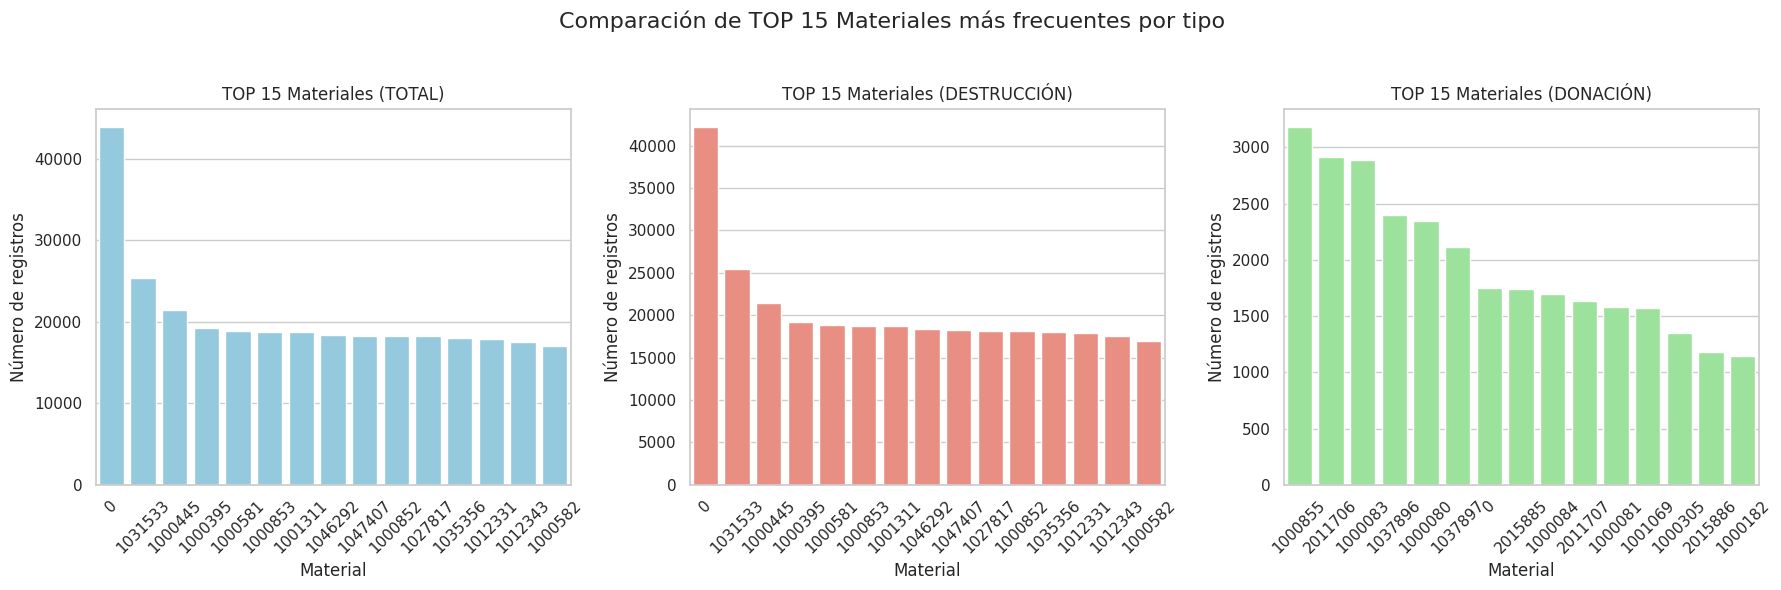

In [102]:
# Gráfico de barras: Material - TOP 15 individual por tipo
plt.figure(figsize=(18, 6))

# Obtener los 15 materiales más frecuentes INDIVIDUALMENTE para cada tipo
top_15_total = df_clean['material'].value_counts().head(15).index
top_15_destruccion = df_clean[df_clean['tipo'] == 'destruccion']['material'].value_counts().head(15).index
top_15_donacion = df_clean[df_clean['tipo'] == 'donacion']['material'].value_counts().head(15).index

# Filtrar datos por tipo
df_destruccion = df_clean[df_clean['tipo'] == 'destruccion']
df_donacion = df_clean[df_clean['tipo'] == 'donacion']

# Crear figura con 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# --- TOTAL ---
sns.countplot(
    x='material',
    data=df_clean[df_clean['material'].isin(top_15_total)],
    color='skyblue',
    order=top_15_total,
    ax=axes[0]
)
axes[0].set_title('TOP 15 Materiales (TOTAL)')
axes[0].set_xlabel('Material')
axes[0].set_ylabel('Número de registros')
axes[0].tick_params(axis='x', rotation=45)

# --- DESTRUCCIÓN ---
sns.countplot(
    x='material',
    data=df_destruccion[df_destruccion['material'].isin(top_15_destruccion)],
    color='salmon',
    order=top_15_destruccion,
    ax=axes[1]
)
axes[1].set_title('TOP 15 Materiales (DESTRUCCIÓN)')
axes[1].set_xlabel('Material')
axes[1].set_ylabel('Número de registros')
axes[1].tick_params(axis='x', rotation=45)

# --- DONACIÓN ---
sns.countplot(
    x='material',
    data=df_donacion[df_donacion['material'].isin(top_15_donacion)],
    color='lightgreen',
    order=top_15_donacion,
    ax=axes[2]
)
axes[2].set_title('TOP 15 Materiales (DONACIÓN)')
axes[2].set_xlabel('Material')
axes[2].set_ylabel('Número de registros')
axes[2].tick_params(axis='x', rotation=45)

# Ajustar diseño
plt.suptitle('Comparación de TOP 15 Materiales más frecuentes por tipo', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Como se evidenció anteriormente, el material '0' es la moda de el data set, sin embargo en la categoría donación no es de esta forma. Sin embargo no es un comportamiento normal, que se estudiará más adelante en la sección de imputación.

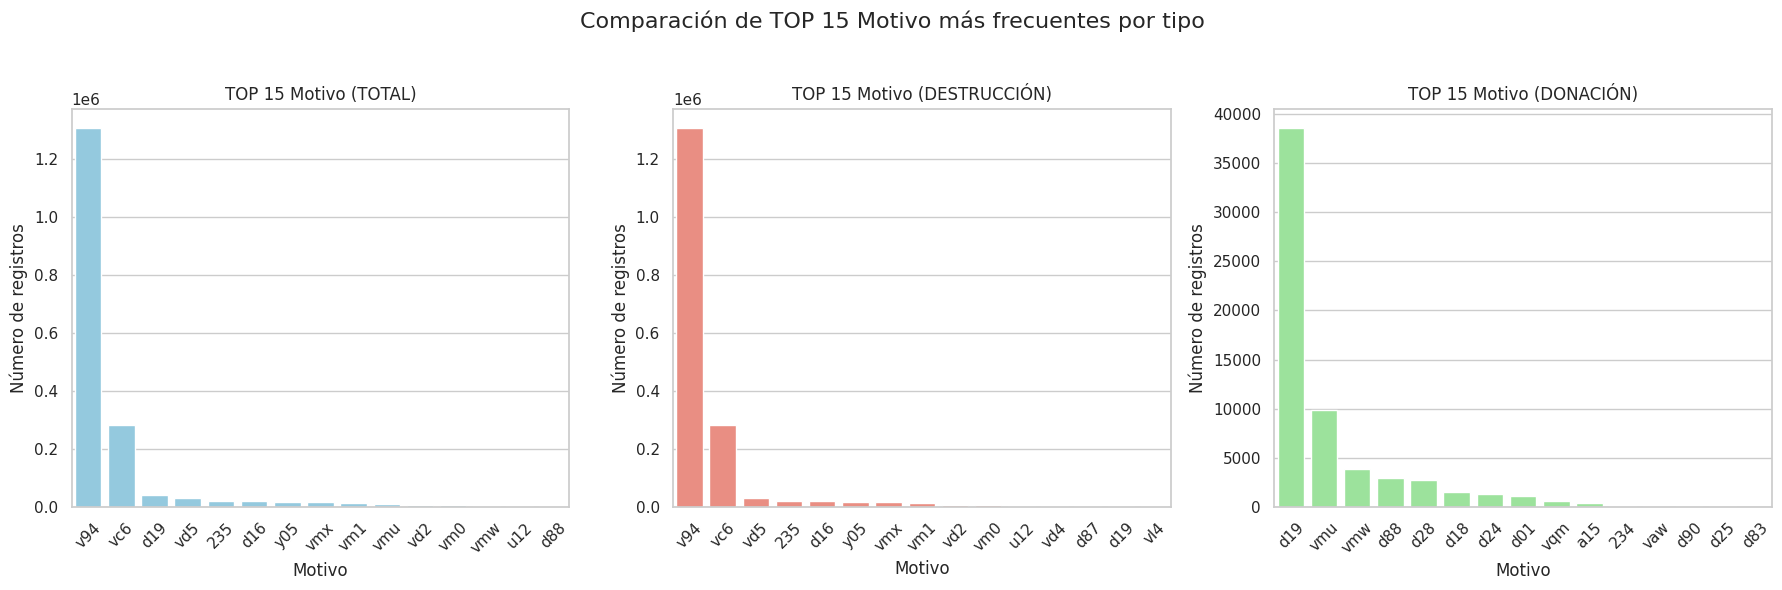

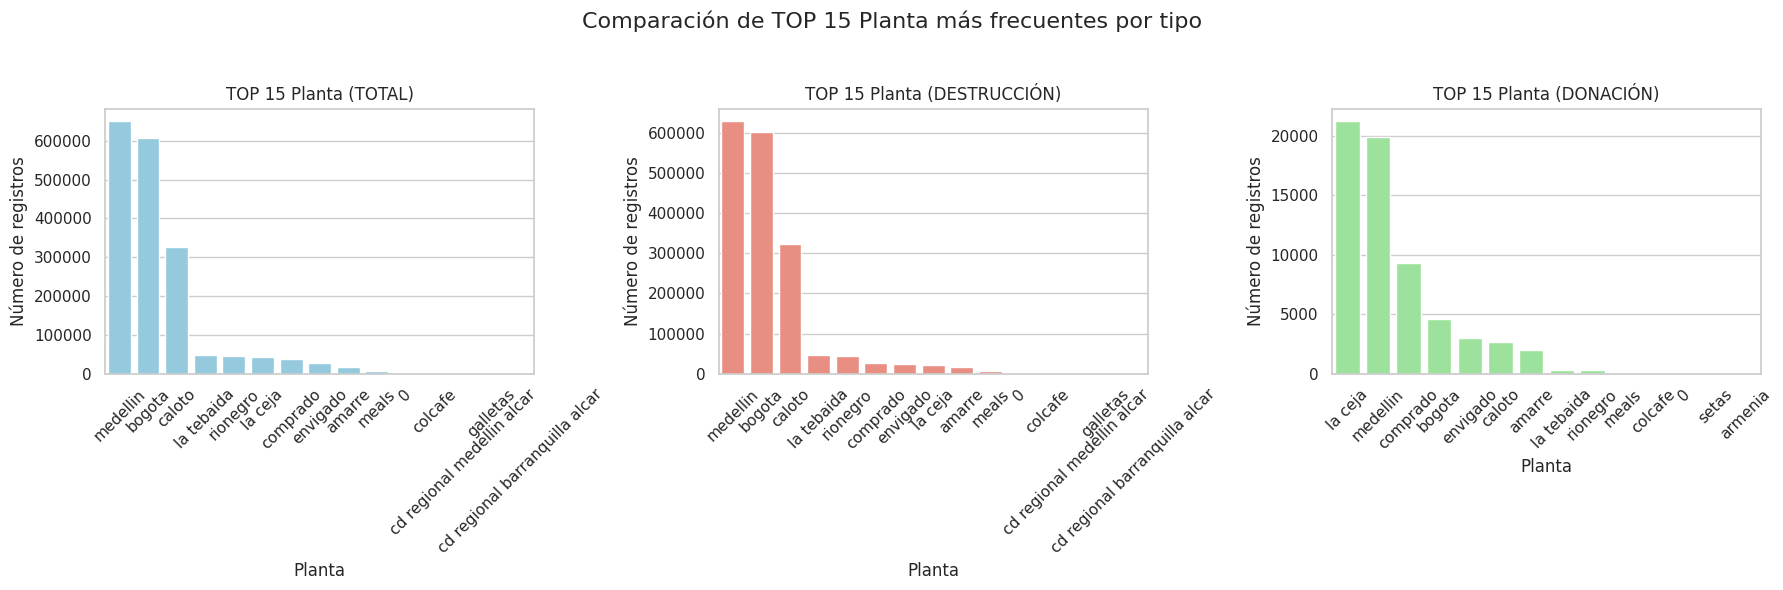

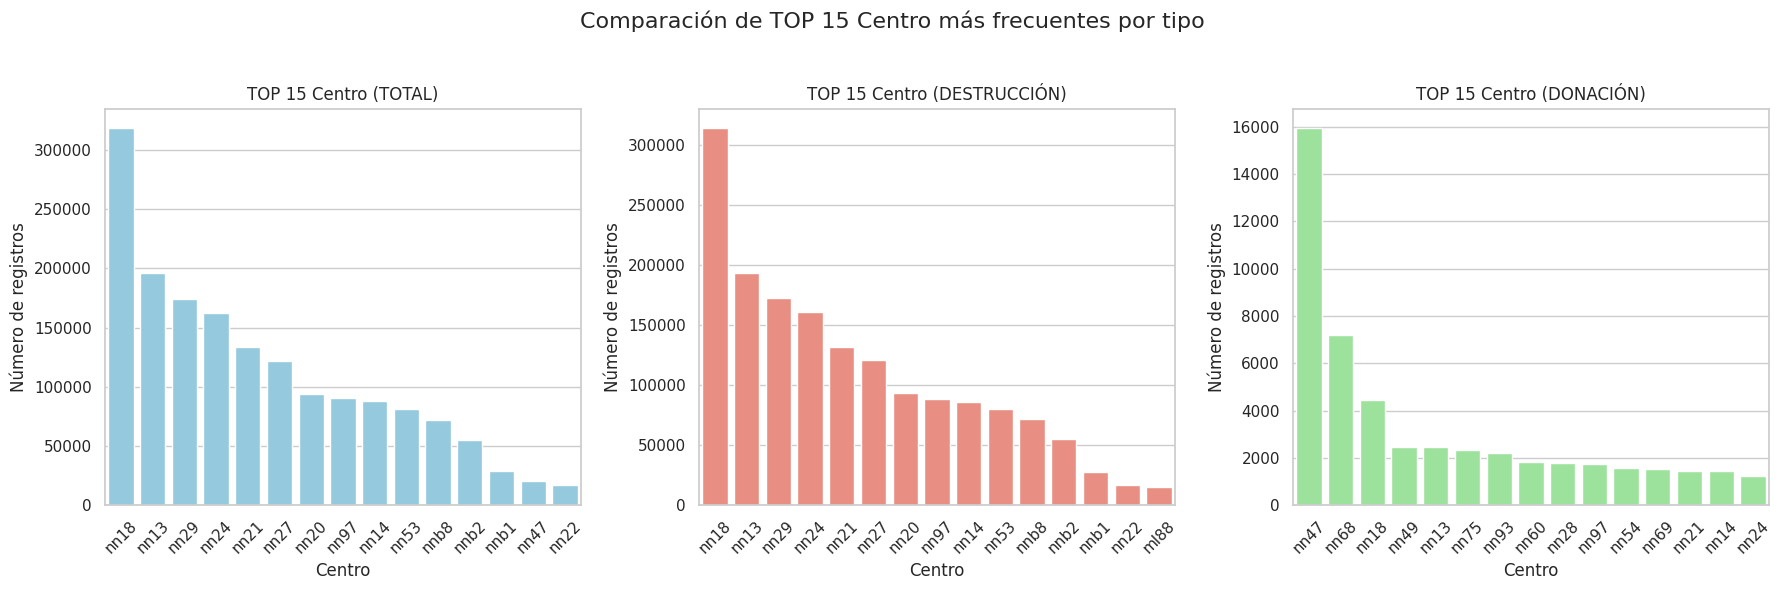

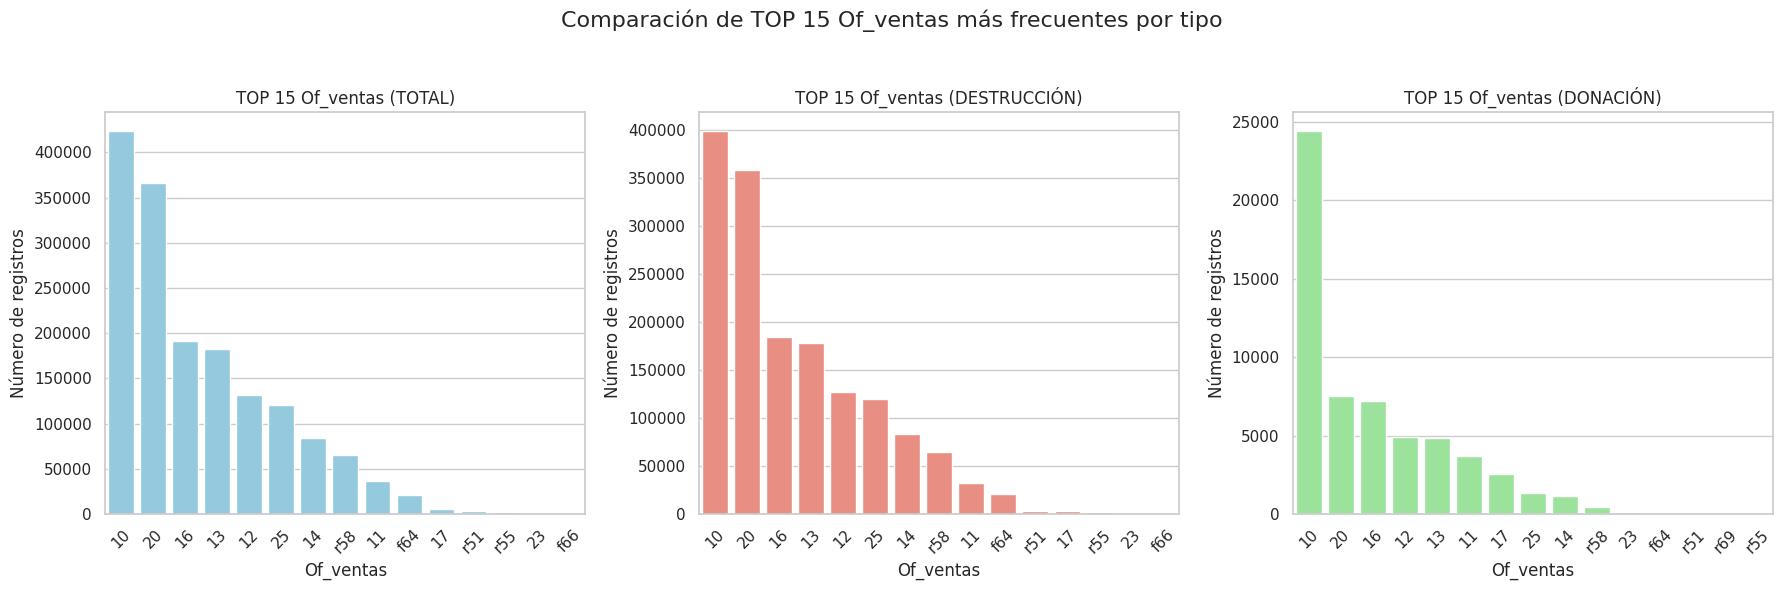

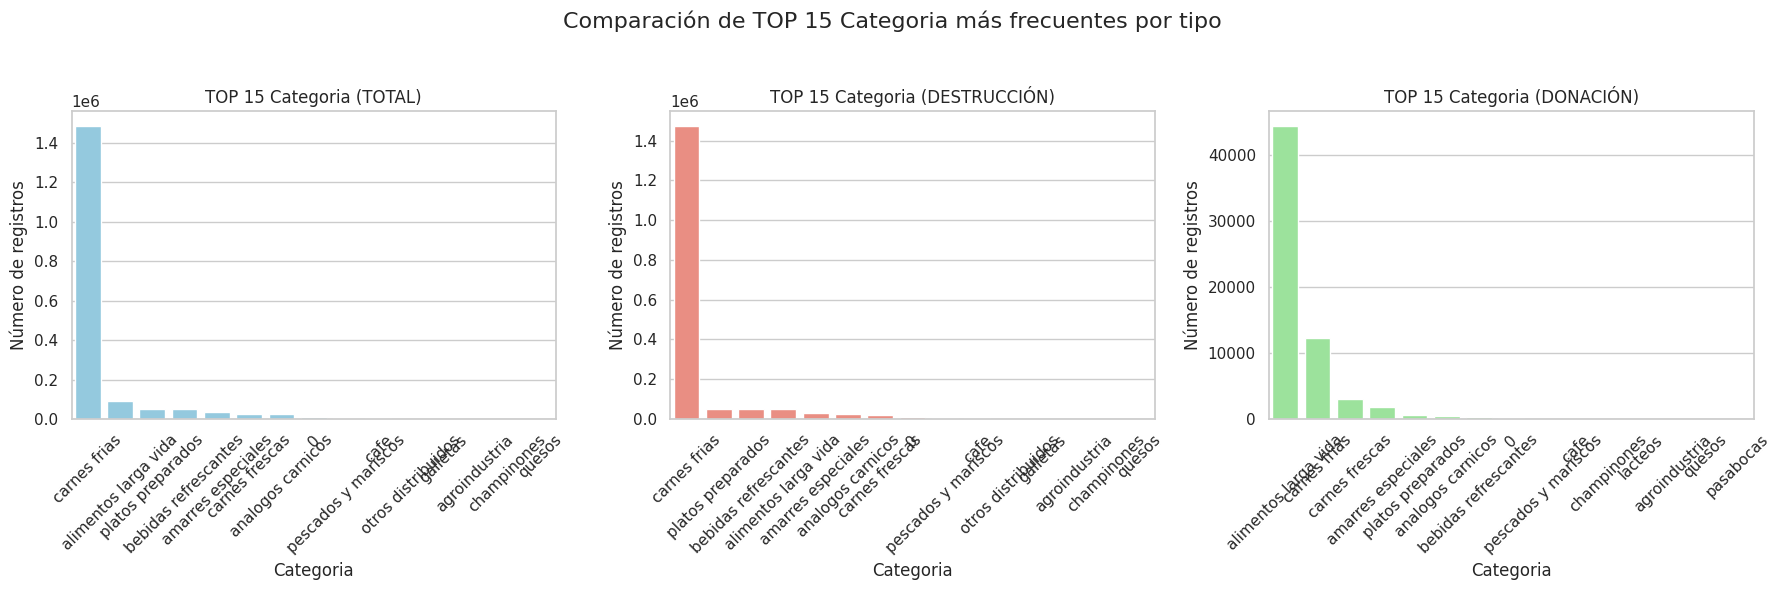

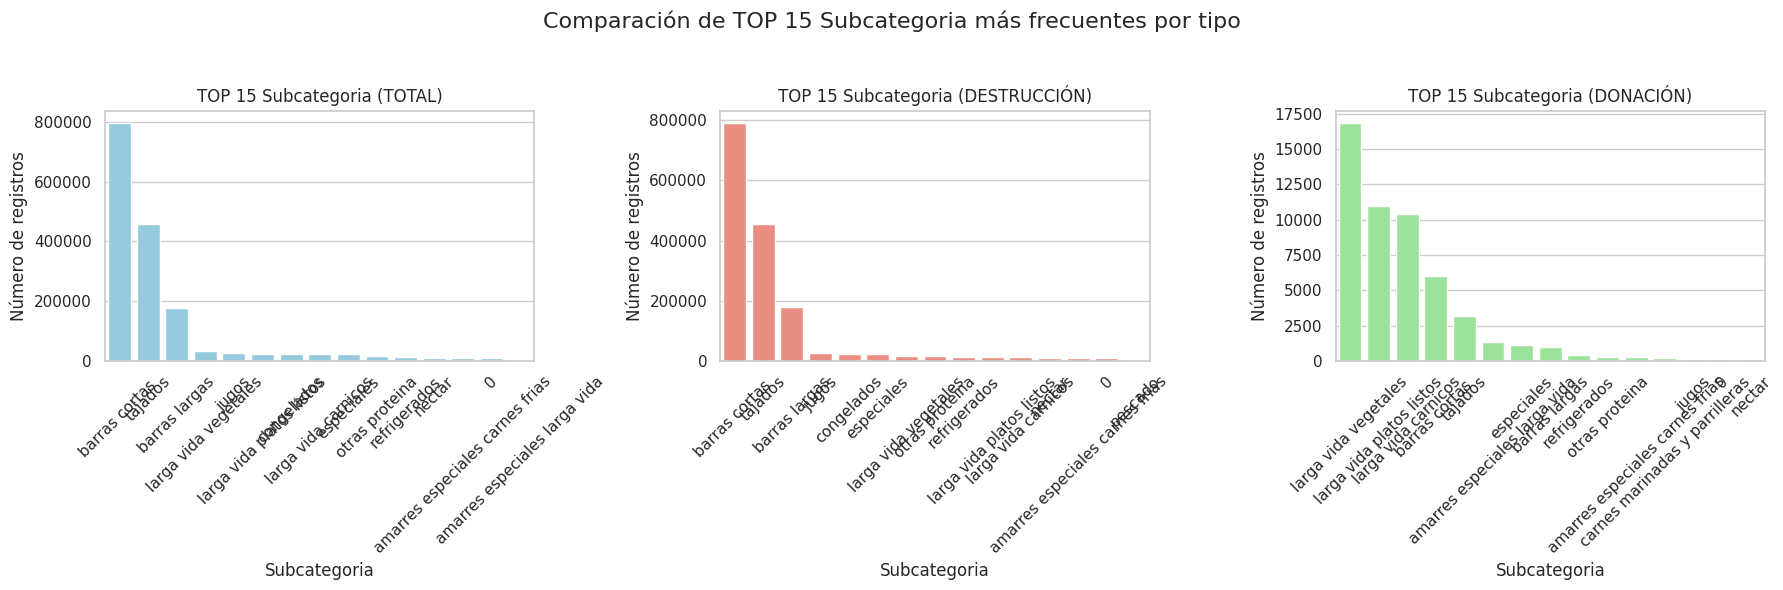

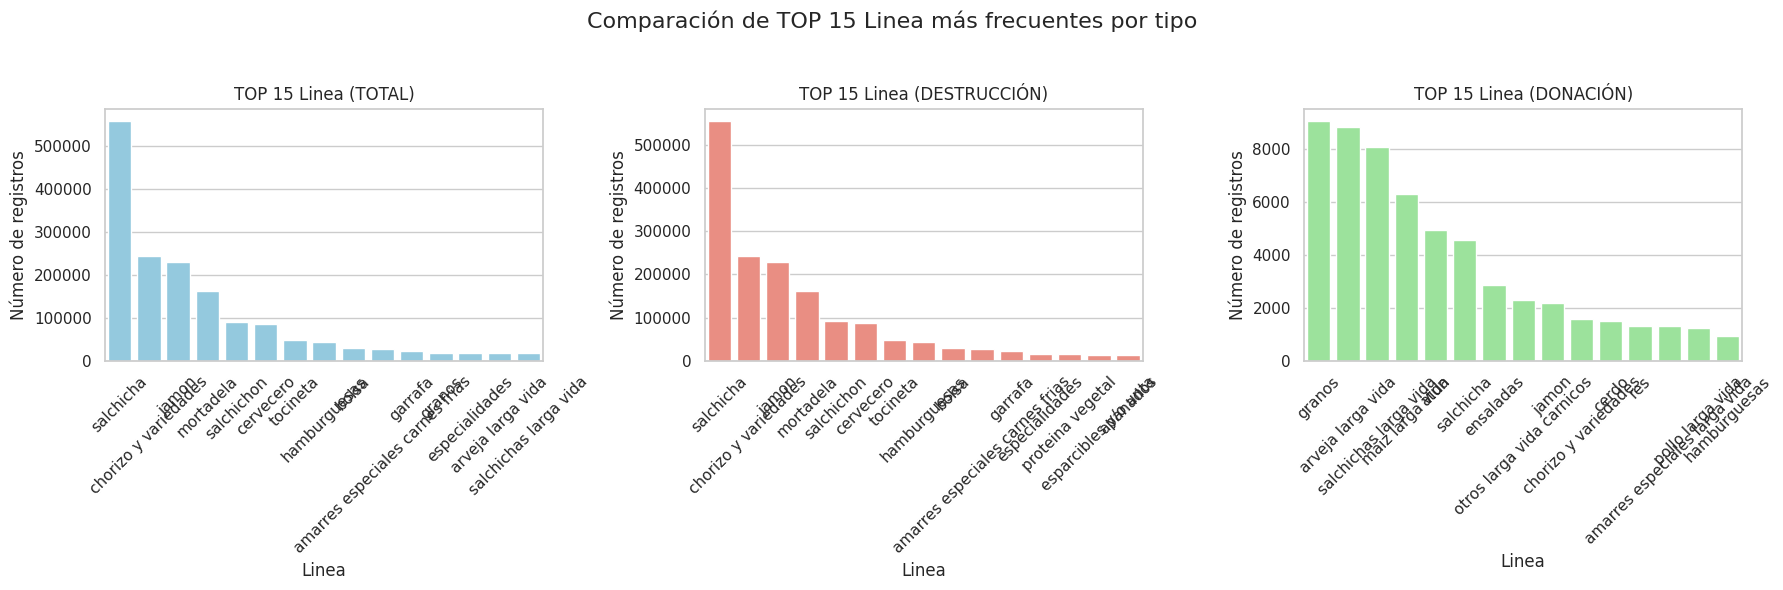

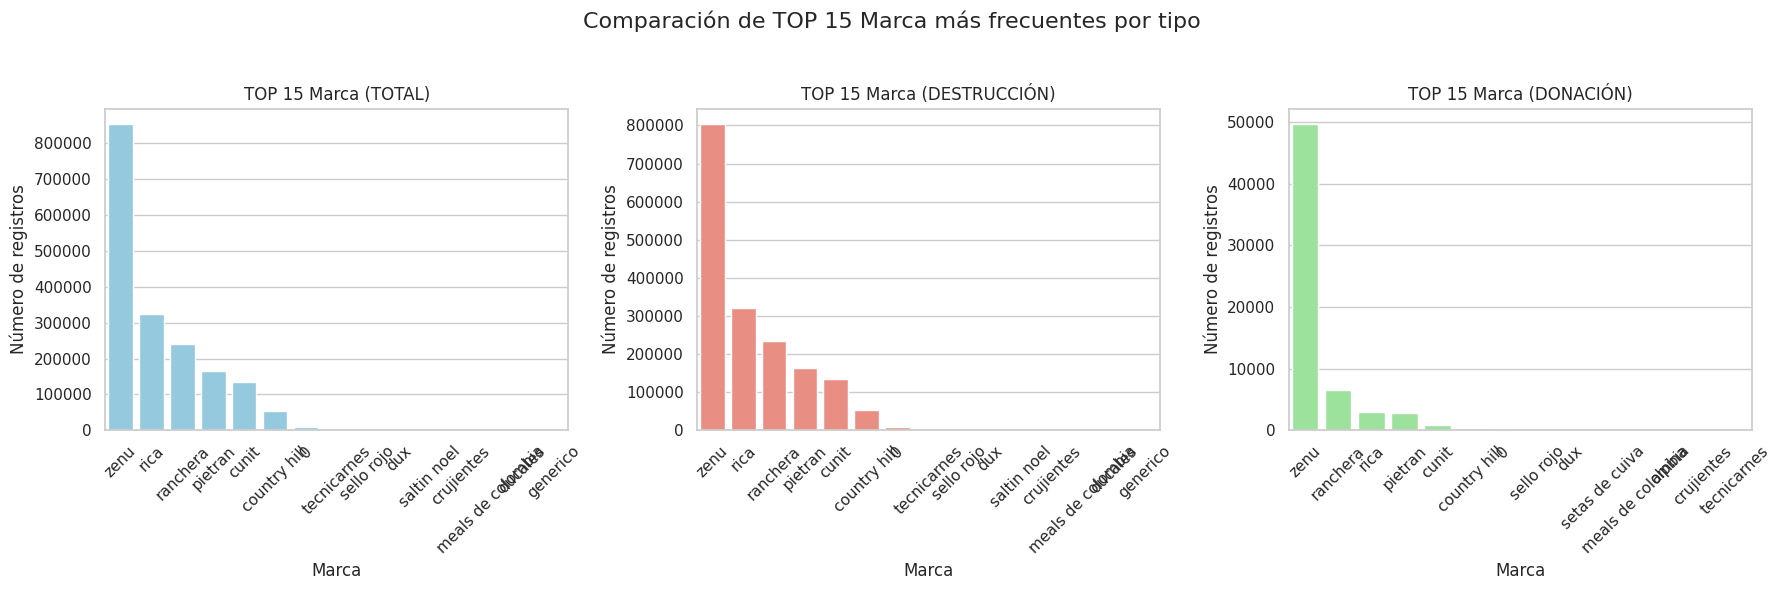

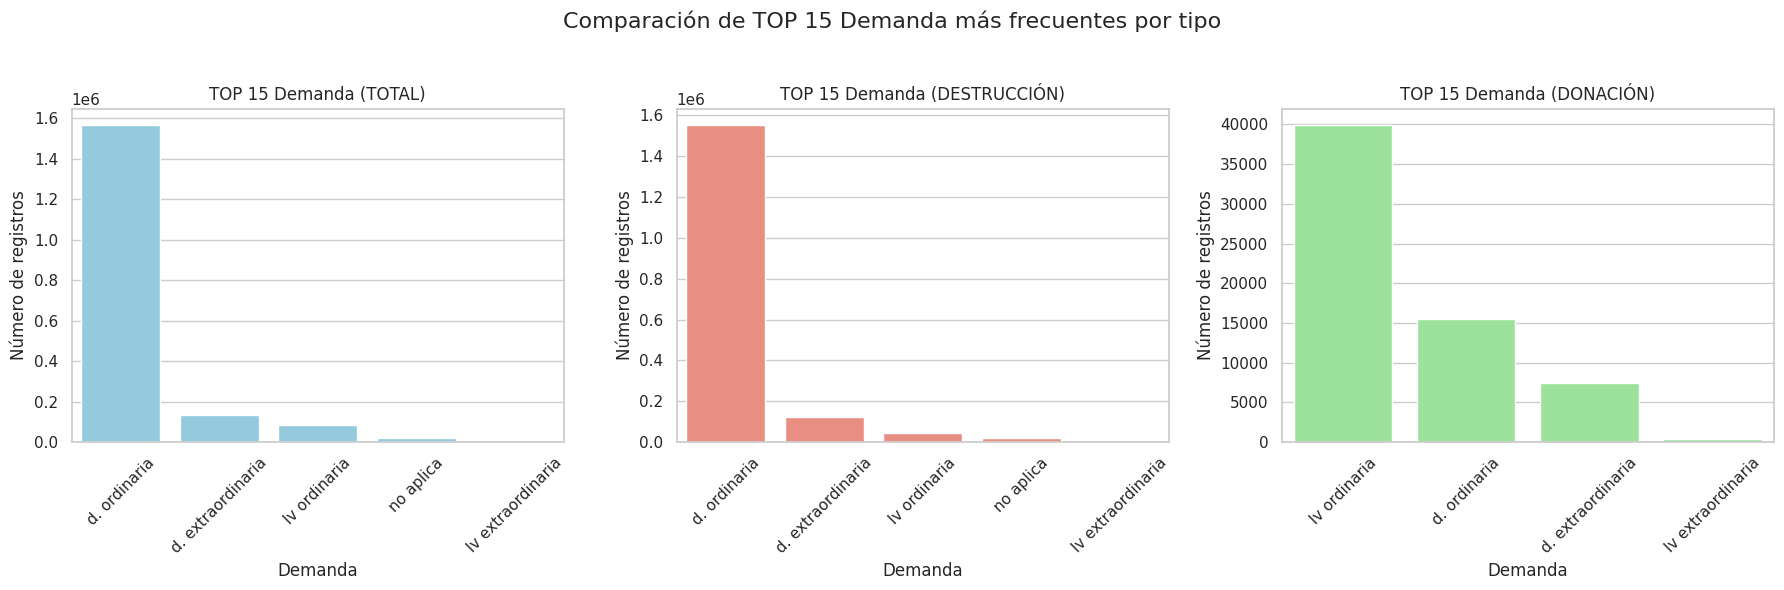

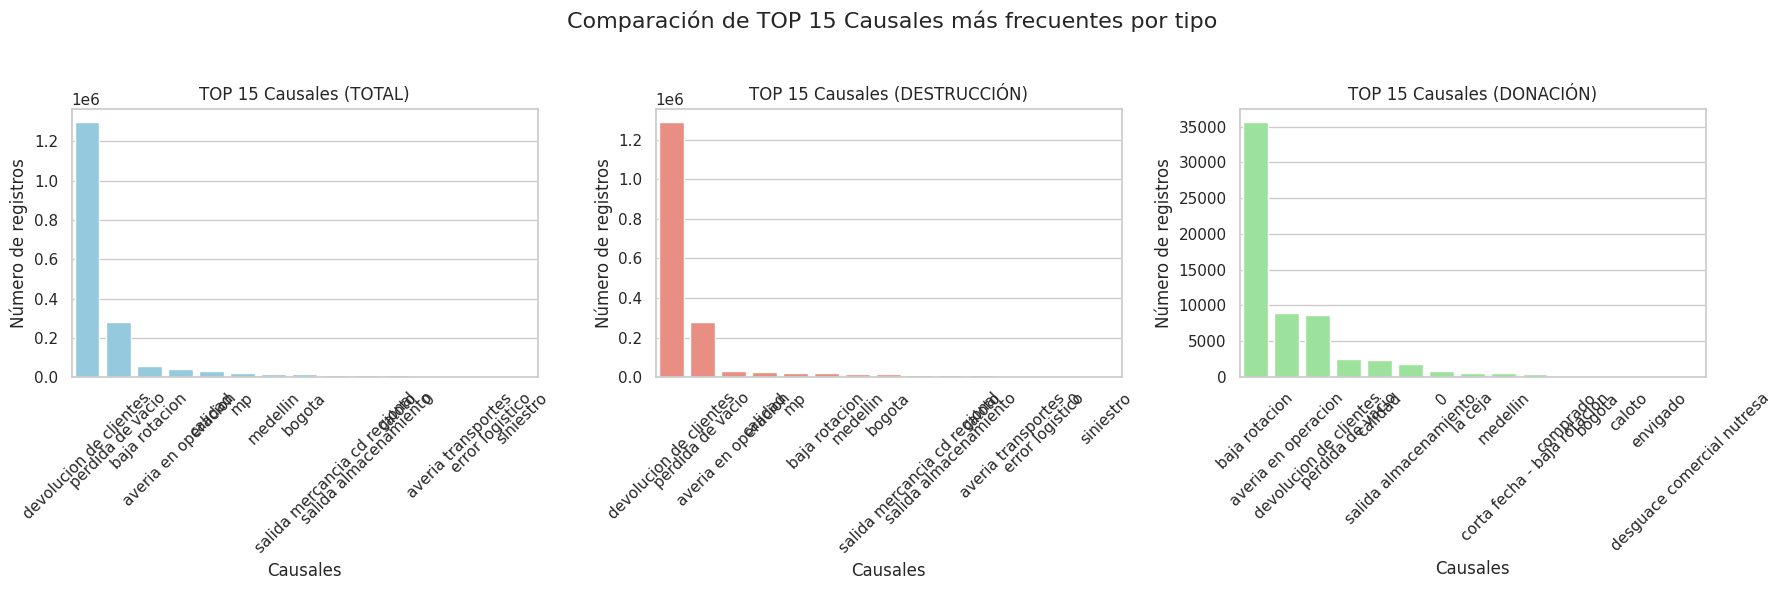

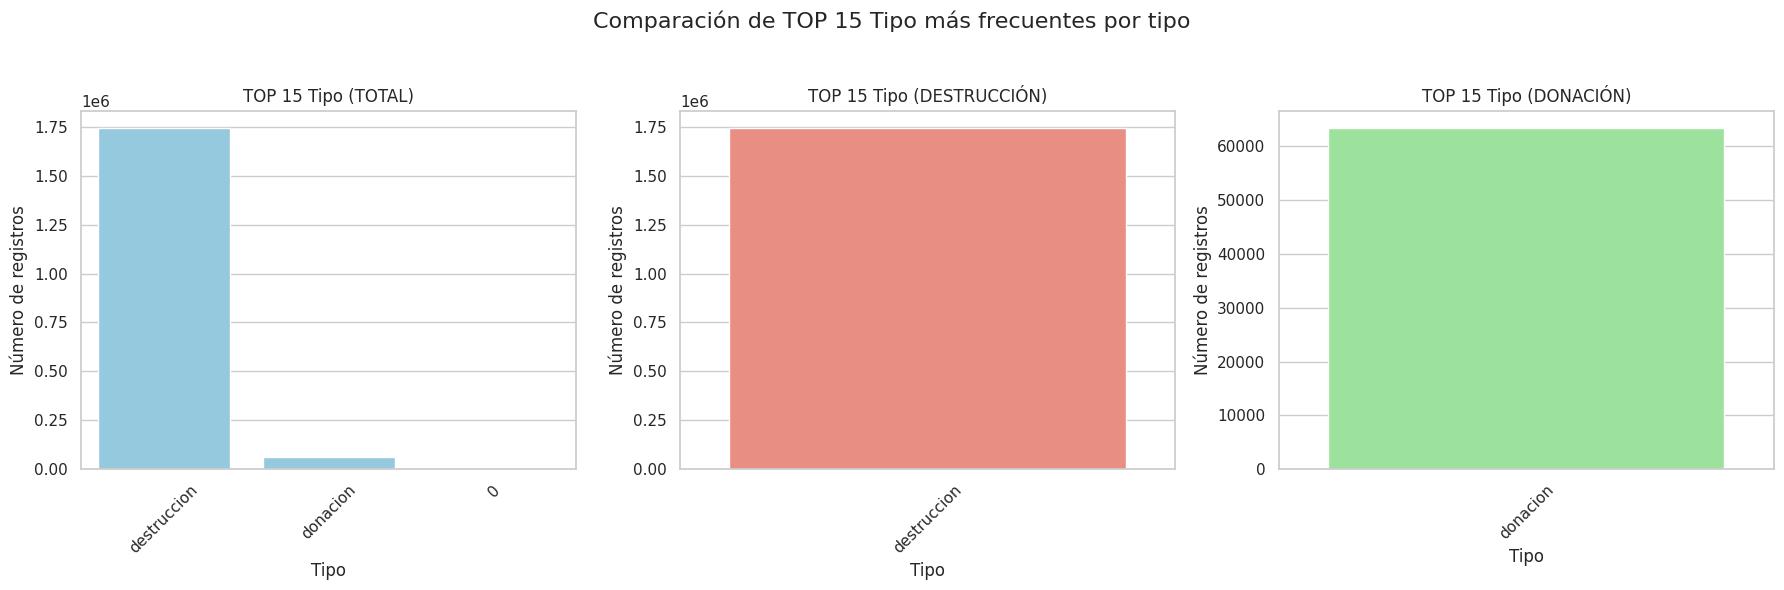

In [104]:
# Lista de columnas a graficar
columnas = [
    'motivo', 'planta', 'centro', 'of_ventas', 
    'categoria', 'subcategoria', 'linea', 
    'marca', 'demanda', 'causales', 'tipo'
]

# Crear un gráfico por cada variable categórica
for col in columnas:
    # Obtener los 15 valores más frecuentes INDIVIDUALMENTE para cada tipo
    top_15_total = df_clean[col].value_counts().head(15).index
    top_15_destruccion = df_clean[df_clean['tipo'] == 'destruccion'][col].value_counts().head(15).index
    top_15_donacion = df_clean[df_clean['tipo'] == 'donacion'][col].value_counts().head(15).index
    
    # Filtrar datos por tipo
    df_destruccion = df_clean[df_clean['tipo'] == 'destruccion']
    df_donacion = df_clean[df_clean['tipo'] == 'donacion']
    
    # Crear figura con 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # --- TOTAL ---
    sns.countplot(
        x=col,
        data=df_clean[df_clean[col].isin(top_15_total)],
        color='skyblue',
        order=top_15_total,
        ax=axes[0]
    )
    axes[0].set_title(f'TOP 15 {col.capitalize()} (TOTAL)')
    axes[0].set_xlabel(col.capitalize())
    axes[0].set_ylabel('Número de registros')
    axes[0].tick_params(axis='x', rotation=45)
    
    # --- DESTRUCCIÓN ---
    sns.countplot(
        x=col,
        data=df_destruccion[df_destruccion[col].isin(top_15_destruccion)],
        color='salmon',
        order=top_15_destruccion,
        ax=axes[1]
    )
    axes[1].set_title(f'TOP 15 {col.capitalize()} (DESTRUCCIÓN)')
    axes[1].set_xlabel(col.capitalize())
    axes[1].set_ylabel('Número de registros')
    axes[1].tick_params(axis='x', rotation=45)
    
    # --- DONACIÓN ---
    sns.countplot(
        x=col,
        data=df_donacion[df_donacion[col].isin(top_15_donacion)],
        color='lightgreen',
        order=top_15_donacion,
        ax=axes[2]
    )
    axes[2].set_title(f'TOP 15 {col.capitalize()} (DONACIÓN)')
    axes[2].set_xlabel(col.capitalize())
    axes[2].set_ylabel('Número de registros')
    axes[2].tick_params(axis='x', rotation=45)
    
    # Ajustar diseño
    plt.suptitle(f'Comparación de TOP 15 {col.capitalize()} más frecuentes por tipo', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

En vista que que la data está formada por códigos, se hace la búsqueda en la data madre para entender su correspondencia.

In [ ]:
# Buscar valor en CSV y mostrar resultado correspondiente
# 1. Cargar el CSV 
df = pd.read_csv('desguace_data_hist.csv')

# 2. Buscar el valor exacto
valor_buscar = 'D19'   
columna_buscar = 'C# Motivo ped'
columna_resultado = 'Motivo de pedido'

# 3. Filtrar el DataFrame
resultado = df.loc[df[columna_buscar] == valor_buscar, columna_resultado]

# 4. Mostrar el resultado
if not resultado.empty:
    print(f"El valor correspondiente en '{columna_resultado}' es:", resultado.iloc[0])
else:
    print(f"No se encontró '{valor_buscar}' en la columna '{columna_buscar}'.")


El valor correspondiente en 'Motivo de pedido' es: Donacion Mala manipulación almacén o transporte


In [ ]:
# Buscar valor en CSV y mostrar resultado correspondiente
# 1. Cargar el CSV 
df = pd.read_csv('desguace_data_hist.csv')

# 2. Buscar el valor exacto
valor_buscar = 'V94'   
columna_buscar = 'C# Motivo ped'
columna_resultado = 'Motivo de pedido'

# 3. Filtrar el DataFrame
resultado = df.loc[df[columna_buscar] == valor_buscar, columna_resultado]

# 4. Mostrar el resultado
if not resultado.empty:
    print(f"El valor correspondiente en '{columna_resultado}' es:", resultado.iloc[0])
else:
    print(f"No se encontró '{valor_buscar}' en la columna '{columna_buscar}'.")

El valor correspondiente en 'Motivo de pedido' es: Destrucción - Devolucion clientes CD Regional


In [ ]:
# Buscar valor en CSV y mostrar resultado correspondiente
# 2. Buscar el valor exacto
valor_buscar = 'NN47'   
columna_buscar = 'C# Centro'
columna_resultado = 'Centro'

# 3. Filtrar el DataFrame
resultado = df.loc[df[columna_buscar] == valor_buscar, columna_resultado]

# 4. Mostrar el resultado
if not resultado.empty:
    print(f"El valor correspondiente en '{columna_resultado}' es:", resultado.iloc[0])
else:
    print(f"No se encontró '{valor_buscar}' en la columna '{columna_buscar}'.")


El valor correspondiente en 'Centro' es: Comercial Nutresa Bogotá Op. Propia


In [ ]:
# Buscar valor en CSV y mostrar resultado correspondiente
# 2. Buscar el valor exacto
valor_buscar = 'NN18'   
columna_buscar = 'C# Centro'
columna_resultado = 'Centro'

# 3. Filtrar el DataFrame
resultado = df.loc[df[columna_buscar] == valor_buscar, columna_resultado]

# 4. Mostrar el resultado
if not resultado.empty:
    print(f"El valor correspondiente en '{columna_resultado}' es:", resultado.iloc[0])
else:
    print(f"No se encontró '{valor_buscar}' en la columna '{columna_buscar}'.")

El valor correspondiente en 'Centro' es: CD Regional Bogotá


In [ ]:
# Buscar valor en CSV y mostrar resultado correspondiente
# 2. Buscar el valor exacto
valor_buscar = '10'   
columna_buscar = 'Ofc# Ventas'
columna_resultado = 'Descripcion de la oficina'

# 3. Filtrar el DataFrame
resultado = df.loc[df[columna_buscar] == valor_buscar, columna_resultado]

# 4. Mostrar el resultado
if not resultado.empty:
    print(f"El valor correspondiente en '{columna_resultado}' es:", resultado.iloc[0])
else:
    print(f"No se encontró '{valor_buscar}' en la columna '{columna_buscar}'.")

El valor correspondiente en 'Descripcion de la oficina' es: R Bogotá


🔹 Observaciones importantes:

Los resultados presentan una alta participación de donación por mala manipulación en el almacén o en el transporte, esto quiere decir que hay procesos en planta que pueden optimizarse y mejorar. Hay una congruencia en los resultados, ya que los alimentos de categoría y subcategoría "Larga vida" son elaborados en la planta de "La Ceja" y son los que cuentan con una participación mayor, así también como el tipo de demanda que en su mayoría son de "demanda larga vida". Por otro lado, vemos que el Centro dónde mas se presentan donaciones es en "Comercial Nutresa Bogotá Op. Propia" y está muy relacionado con la Oficina de ventas con mayor devoluciones, que es "R Bogotá". Es decir, que los alimentos que presentan una fecha de vencimiento más extensa son los que más se donan, elaborados en la Planta de "La Ceja" y distribuídos desde el CEDI de Comercial Nutresa en Bogotá. Adicionalmente, dentro del Top de productos hay uno con código "0", que genera duda y se analizará en detalle más adelantes.

Por su parte, las destrucciones tienen un comportamiento diferente, ya que en su mayoría son por el motivo de devoluciones, siendo las devoluciones otra base datos u otra información que impacta directamente, y el CEDI dónde se generan más destrucciones es en el de Bogotá, que si bien es diferente a las donaciones, es uno de los principales de la cadena de abastecimiento.

**_Análisis temporal_**

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_23888\997035576.py:77: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


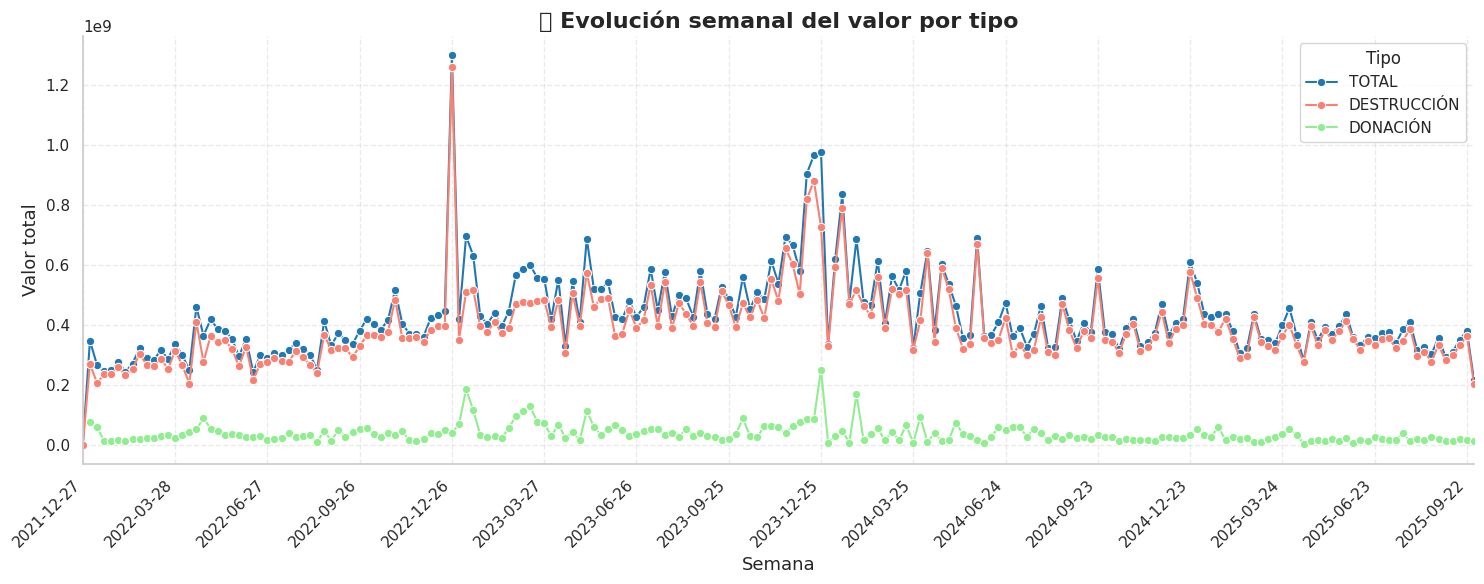

In [ ]:
# ============================
# Gráfico de líneas: Evolución semanal del valor por tipo
# Crear un dataframe copia para NO modificar df_clean
df_plot = df_clean.copy()

# Asegurar que 'fecha' esté en formato datetime
df_plot["fecha"] = pd.to_datetime(df_plot["fecha"].astype(str), errors="coerce")
df_plot = df_plot.dropna(subset=["fecha"])

# Crear columna de semana (inicio de semana: lunes)
df_plot["semana"] = df_plot["fecha"].dt.to_period("W").apply(lambda r: r.start_time)

# Filtrar datos por tipo
df_destruccion = df_plot[df_plot['tipo'] == 'destruccion']
df_donacion = df_plot[df_plot['tipo'] == 'donacion']

# Agrupar por semana y sumar valor total para cada tipo
df_semana_total = (
    df_plot.groupby("semana", observed=True)["valor"]
    .sum()
    .reset_index()
    .sort_values("semana")
)
df_semana_total['tipo'] = 'TOTAL'

df_semana_destruccion = (
    df_destruccion.groupby("semana", observed=True)["valor"]
    .sum()
    .reset_index()
    .sort_values("semana")
)
df_semana_destruccion['tipo'] = 'DESTRUCCIÓN'

df_semana_donacion = (
    df_donacion.groupby("semana", observed=True)["valor"]
    .sum()
    .reset_index()
    .sort_values("semana")
)
df_semana_donacion['tipo'] = 'DONACIÓN'

# Combinar todos los datos
df_combinado = pd.concat([df_semana_total, df_semana_destruccion, df_semana_donacion])

# ============================
# Gráfico combinado
# ============================
plt.figure(figsize=(15, 6))

sns.lineplot(
    data=df_combinado, 
    x="semana", 
    y="valor", 
    hue="tipo",
    palette={'TOTAL': '#1f77b4', 'DESTRUCCIÓN': 'salmon', 'DONACIÓN': 'lightgreen'},
    linewidth=1.5, 
    marker="o"
)

# Formato eje X
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

if len(df_semana_total) > 0:
    plt.xlim(df_semana_total["semana"].iloc[0], df_semana_total["semana"].iloc[-1])
    plt.xticks(
        df_semana_total["semana"][::max(1, len(df_semana_total)//15)], 
        rotation=45, ha='right'
    )

# Título y etiquetas
plt.title("📈 Evolución semanal del valor por tipo", fontsize=16, fontweight='bold')
plt.xlabel("Semana", fontsize=13)
plt.ylabel("Valor total", fontsize=13)
plt.legend(title="Tipo")

sns.despine()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


🔹 Observaciones importantes:

En la gráfica se observa la diferencia en las proporciones entre donaciones y destrucciones, se podría afirmar que hay una oportunidad de disminuír esa brecha, aumentando el valor de las donaciones y disminuyendo el de las destrucciones. Los picos más altos se visualizan justamente en fechas de fin de año (2022 y 2023) y en los años 2023 y 2024 se puede observar un comportamiento embudo, de inicio de año valores altos y va disminuyendo a medida que avanza el tiempo. Adicionalmente se evidencia que desde el año 2024 las fluctuaciones se han disminuído, generando un comportamiento más estable tanto en las donaciones, como en las destrucciones.

**_Análisis del valor por planta y centro_**

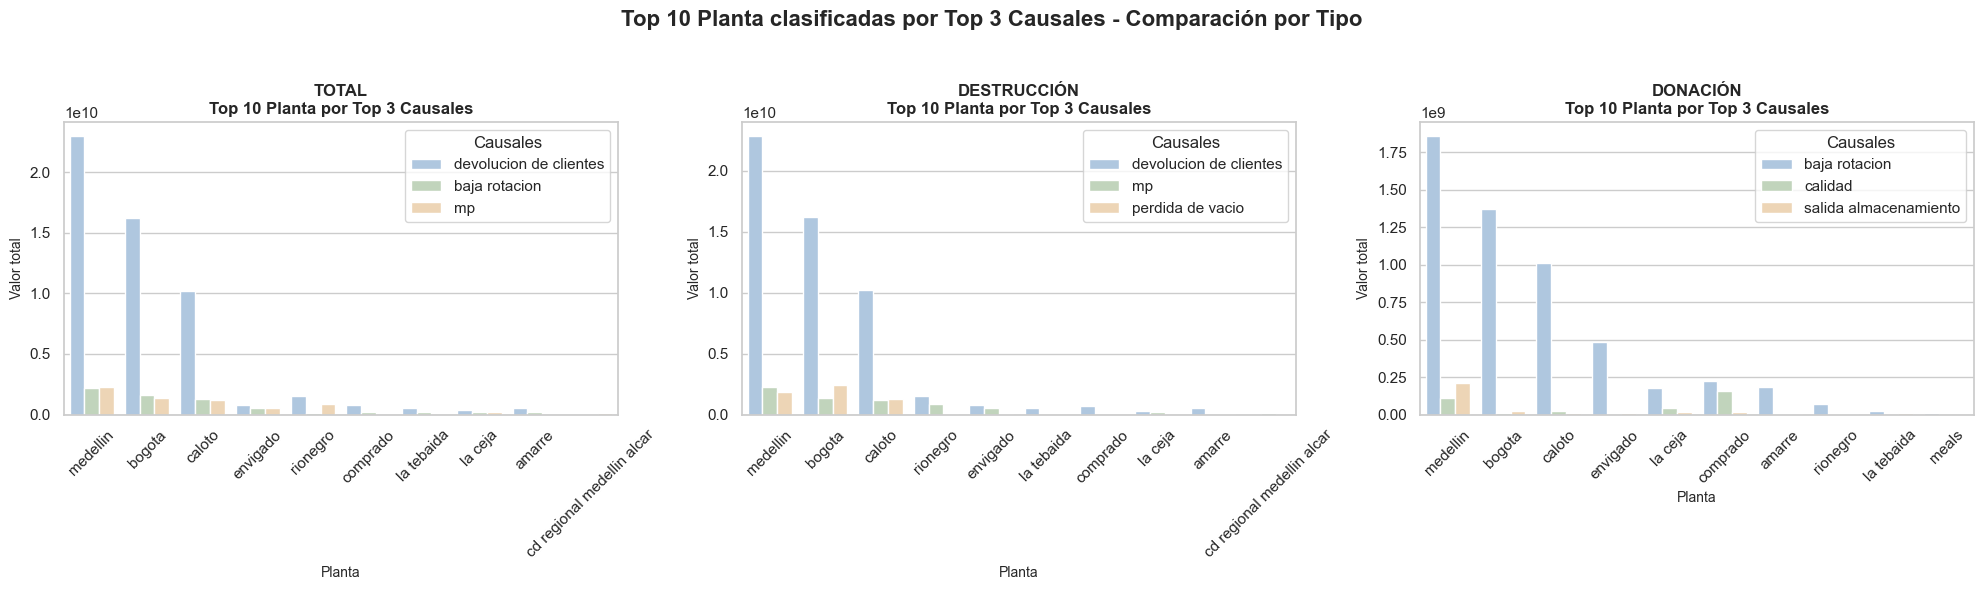

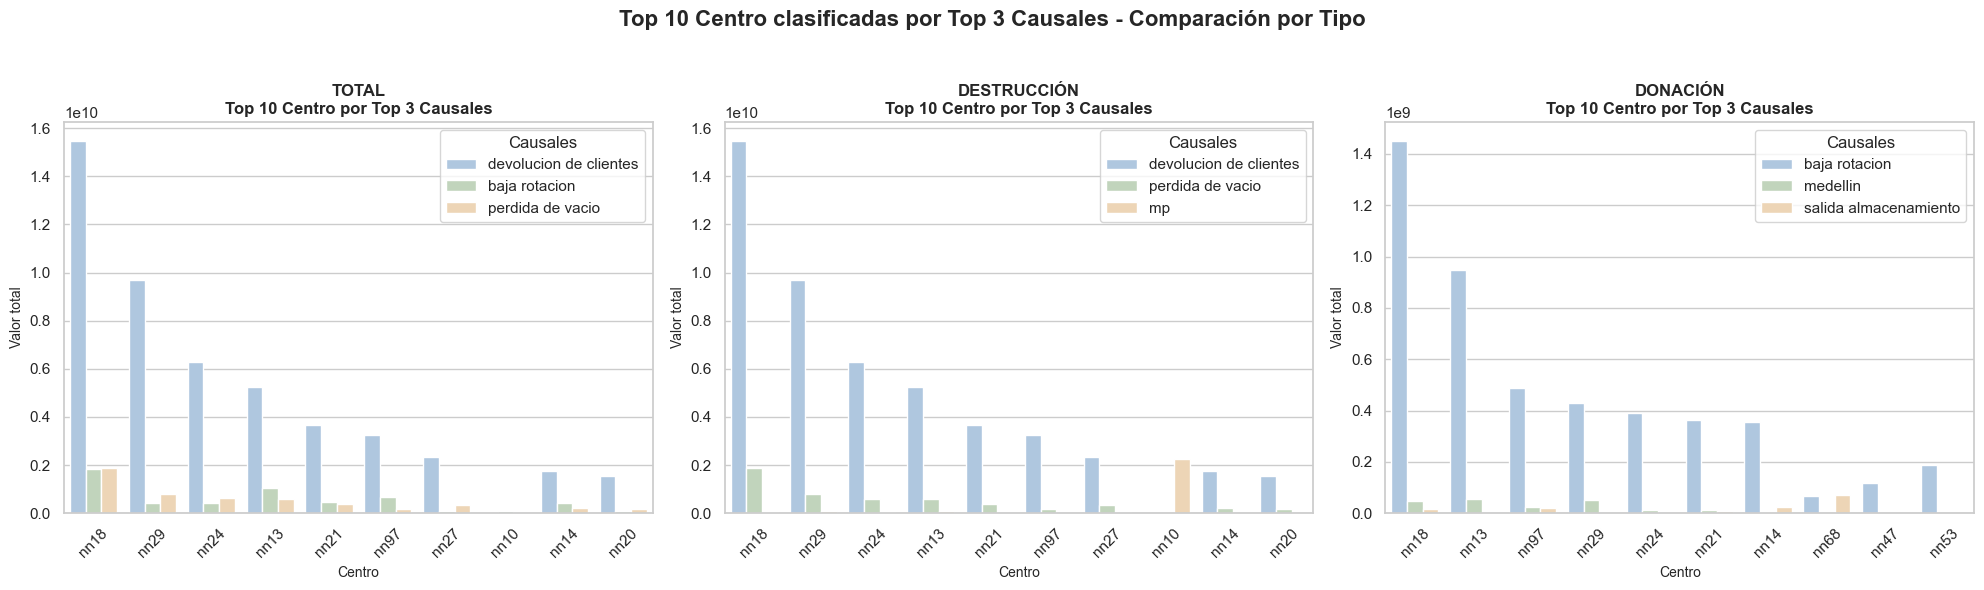

In [52]:
# ========================
# CONFIGURACIÓN GENERAL
# ========================

sns.set_theme(style="whitegrid")
palette_pastel = ['#A7C7E7', '#BFD8B8', '#F6D6AD']

# ========================
# FUNCIÓN GENERALIZADA POR TIPO
# ========================

def plot_top_by_variable_por_tipo(df, variable_x, variable_valor='valor', variable_hue='causales',
                                 top_n_x=10, top_n_hue=3, palette=palette_pastel):
    """
    Genera TRES gráficos de barras mostrando el TOP N de una variable (variable_x)
    clasificada por las TOP M categorías de otra variable (variable_hue),
    diferenciando por TOTAL, DESTRUCCIÓN y DONACIÓN.
    """
    
    # Crear figura con 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    # Datos para cada tipo
    tipos = ['TOTAL', 'destruccion', 'donacion']
    titulos = ['TOTAL', 'DESTRUCCIÓN', 'DONACIÓN']
    colores = ['#A7C7E7', '#FFB6C1', '#98FB98']  # azul, rosa, verde pastel
    
    for i, (tipo, titulo, color) in enumerate(zip(tipos, titulos, colores)):
        
        # Filtrar datos según el tipo
        if tipo == 'TOTAL':
            df_filtrado = df
        else:
            df_filtrado = df[df['tipo'] == tipo]
        
        # --- Paso 1: determinar el TOP N de la variable principal por valor total ---
        top_x = (
            df_filtrado.groupby(variable_x)[variable_valor]
            .sum()
            .nlargest(top_n_x)
        )
        x_ordenadas = top_x.index

        # Filtrar solo los valores del TOP N
        df_top_x = df_filtrado[df_filtrado[variable_x].isin(x_ordenadas)]

        # --- Paso 2: determinar el TOP M de la variable hue por valor total ---
        top_hue = (
            df_top_x.groupby(variable_hue)[variable_valor]
            .sum()
            .nlargest(top_n_hue)
        )
        hue_ordenadas = top_hue.index

        # Filtrar solo las categorías hue principales
        df_top = df_top_x[df_top_x[variable_hue].isin(hue_ordenadas)]

        # --- Paso 3: agrupar datos para graficar ---
        df_plot = (
            df_top.groupby([variable_x, variable_hue])[variable_valor]
            .sum()
            .reset_index()
        )

        # --- Paso 4: definir orden descendente ---
        df_plot[variable_x] = pd.Categorical(df_plot[variable_x], categories=x_ordenadas, ordered=True)
        df_plot[variable_hue] = pd.Categorical(df_plot[variable_hue], categories=hue_ordenadas, ordered=True)

        # --- Paso 5: gráfico ---
        if len(df_plot) > 0:
            sns.barplot(
                data=df_plot,
                x=variable_x,
                y=variable_valor,
                hue=variable_hue,
                palette=palette,
                ax=axes[i]
            )
            
            axes[i].set_title(f"{titulo}\nTop {top_n_x} {variable_x.capitalize()} por Top {top_n_hue} {variable_hue.capitalize()}",
                            fontsize=12, fontweight='bold')
            axes[i].set_xlabel(variable_x.capitalize(), fontsize=10)
            axes[i].set_ylabel("Valor total", fontsize=10)
            axes[i].tick_params(axis='x', rotation=45)
            axes[i].legend(title=f"{variable_hue.capitalize()}", loc='best')
        else:
            axes[i].text(0.5, 0.5, f'No hay datos\npara {titulo}', 
                        ha='center', va='center', transform=axes[i].transAxes, fontsize=12)
            axes[i].set_title(f"{titulo}", fontsize=12, fontweight='bold')
    
    plt.suptitle(f"Top {top_n_x} {variable_x.capitalize()} clasificadas por Top {top_n_hue} {variable_hue.capitalize()} - Comparación por Tipo", 
                fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# ========================
# APLICACIÓN A PLANTA Y CENTRO
# ========================

# --- Gráfico 1: Plantas ---
plot_top_by_variable_por_tipo(df_clean, variable_x='planta', variable_hue='causales')

# --- Gráfico 2: Centros ---
plot_top_by_variable_por_tipo(df_clean, variable_x='centro', variable_hue='causales')

🔹 Observaciones importantes:

Realizando el análisis por el Valor que es la variable de interés en este estudio, se logra evidenciar que en el análisis por Planta, en las tres gráficas, medellín es la que lidera, siendo en destrucción la cuasal de devolución de clientes con una gran participación y en devoluciones la baja rotación.

Por su parte en los centros, planta bogotá es la que destruye y dona los productos con mayor costo, destruyendo por devoluciones la gran mayoria y por donación en baja rotación. Es decir que estas causales que osn en su mayoría de mercadeos se podría evitar para realizar mas donaciones y destrír menos alimentos.

# *Análisis Bivariado*

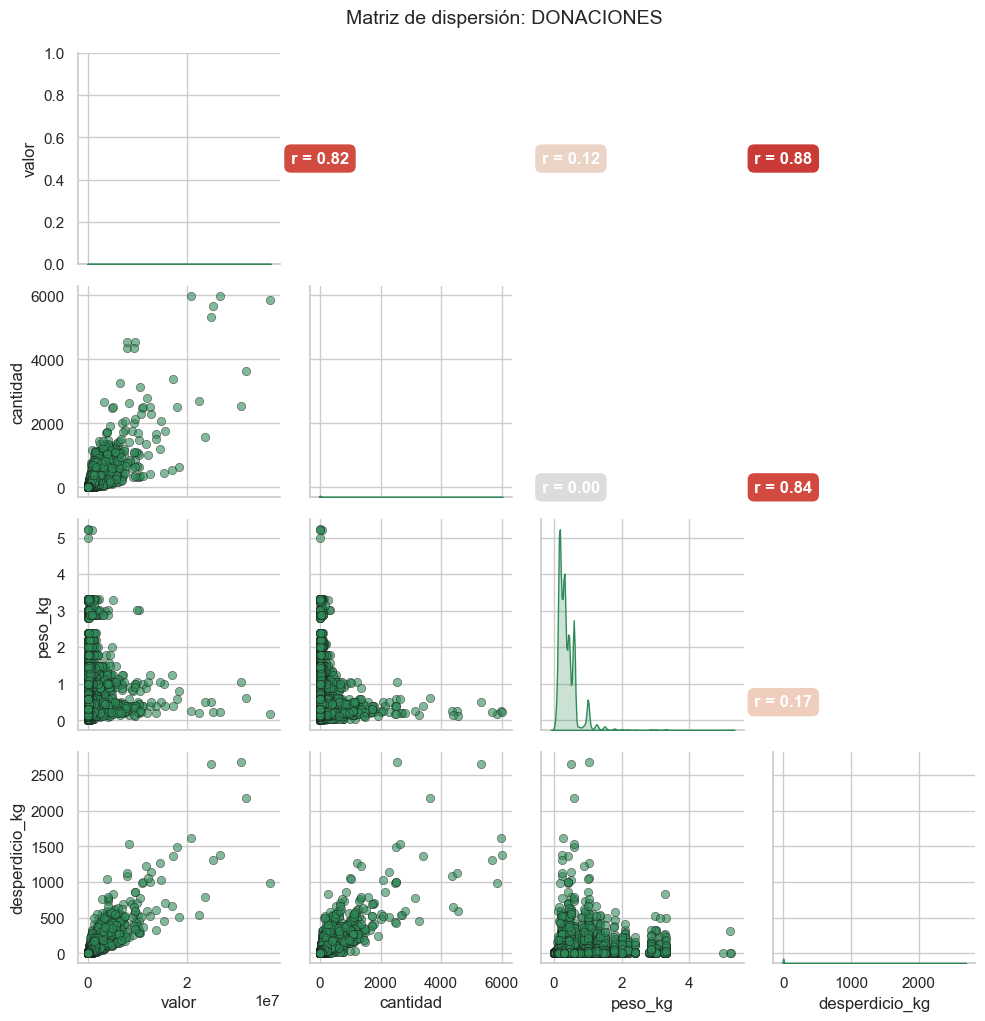

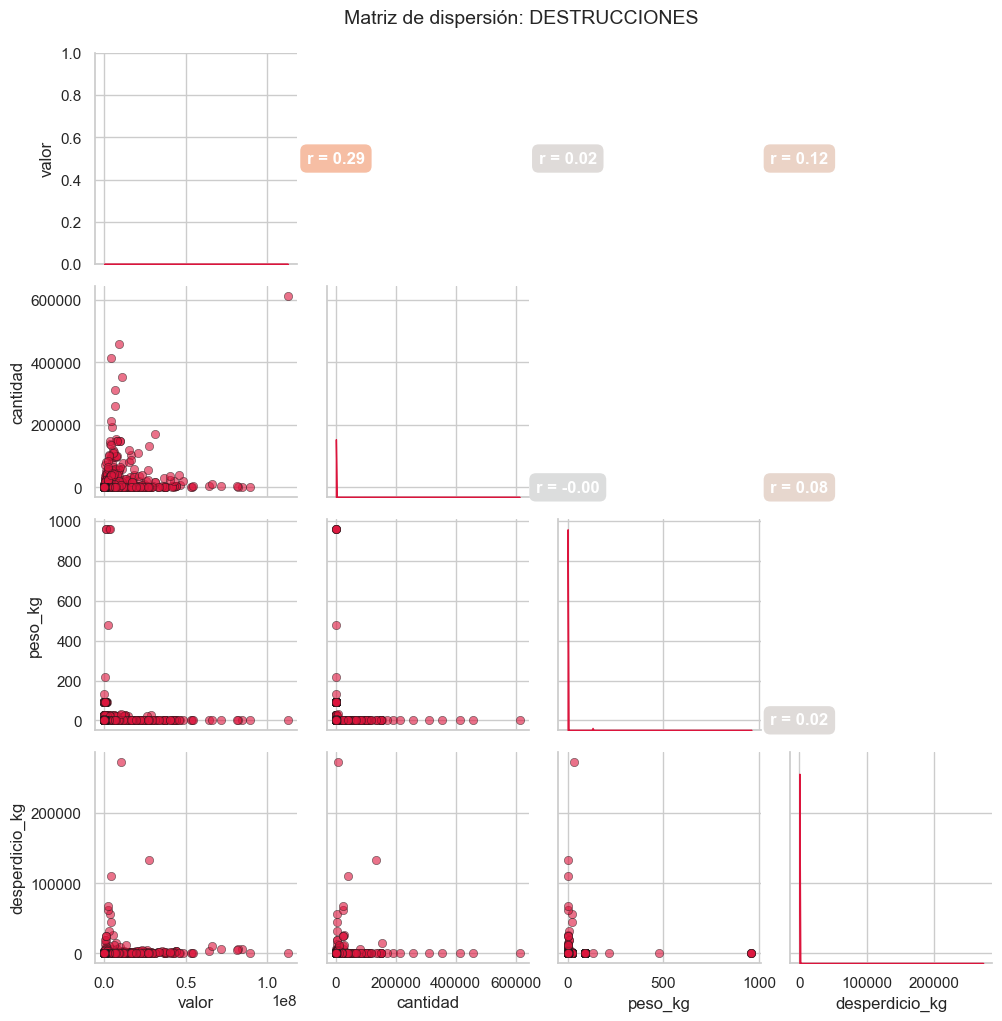

In [ ]:
# ========================
# MATRICES DE DISPERSIÓN POR TIPO
# ========================
# --- Seleccionar las 4 variables continuas ---
variables_continuas = ["valor", "cantidad", "peso_kg", "desperdicio_kg"]

# --- Verificar que existan ---
for var in variables_continuas:
    if var not in df_clean.columns:
        raise ValueError(f"La columna '{var}' no existe en el DataFrame.")

# --- Configurar estilo gráfico ---
sns.set(style="whitegrid", context="notebook")

# --- Función para mostrar correlaciones con color dinámico ---
def corr_coefs(x, y, **kwargs):
    r = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.set_axis_off()
    # Colorear según la intensidad de la correlación
    color = sns.color_palette("coolwarm", as_cmap=True)( (r + 1) / 2 )
    ax.text(0.5, 0.5, f"r = {r:.2f}",
            ha="center", va="center", fontsize=12,
            color="white", weight="bold",
            bbox=dict(facecolor=color, edgecolor="none", boxstyle="round,pad=0.4"))

# --- GRÁFICO 1: DONACIONES ---
df_donacion = df_clean[df_clean['tipo'] == 'donacion']

# Crear el PairGrid para donaciones
g1 = sns.PairGrid(df_donacion[variables_continuas])
g1.map_lower(sns.scatterplot, color="#2E8B57", alpha=0.6, edgecolor="k")  # Verde para donaciones
g1.map_diag(sns.kdeplot, fill=True, color="#2E8B57")
g1.map_upper(corr_coefs)

# Título para donaciones
plt.suptitle("Matriz de dispersión: DONACIONES", y=1.02, fontsize=14)
plt.show()

# --- GRÁFICO 2: DESTRUCCIONES ---
df_destruccion = df_clean[df_clean['tipo'] == 'destruccion']

# Crear el PairGrid para destrucciones
g2 = sns.PairGrid(df_destruccion[variables_continuas])
g2.map_lower(sns.scatterplot, color="#DC143C", alpha=0.6, edgecolor="k")  # Rojo para destrucciones
g2.map_diag(sns.kdeplot, fill=True, color="#DC143C")
g2.map_upper(corr_coefs)

# Título para destrucciones
plt.suptitle("Matriz de dispersión: DESTRUCCIONES", y=1.02, fontsize=14)
plt.show()

🔹 Observaciones importantes:

Para el caso de las donaciones el gráfico de correlaciones muestra una fuerte relación entre la variable respuesta que es "valor"con peso_kg y donacion_kg, ya que la cantidad de donaciones y el peso de las donaciones define el valor de la donación. Por el contrario, presenta baja relación con peso_kg, porque esta variable define el peso de cada unidad del producto, no el total del peso.

Por otro parte, se evidencia un comportamiento extraño en las gráficas de estimación de densidad de la variable respuesta "valor", "cantidad" y "donación", seguramente debido a un problema de escala o distribución de los datos, ya que, como se menciono en el apartado de Descripción y Limpieza:

- Escalas enormemente diferentes: valor tiene media 114,794 vs peso_kg con media 0.38

- Distribuciones muy sesgadas: Valores máximos mucho mayores que las medianas

- Presencia de outliers extremos: valor máximo 36.9M vs mediana 13,200

- Muchos ceros: Especialmente en cantidad (mínimo = 0)


Es por esta razón que en el apartado de escalamiento y normalización se ajustarán estas variables.

En el caso de las destrucciones, es crítico, ya que ninguna de las variables está relacionada, lo que indica que no hay relación lineal fuerte entre las variables. Las variables parecen independientes o solo ligeramente asociadas entre sí, ya que no hay pares de variables con correlación fuerte positiva o negativa. En cuanto a modelo, quiere decir que cada variable aporta información independiente, lo que puede ser útil si se quiere evitar multicolinealidad, pero limita predicciones basadas en relaciones lineales simples.

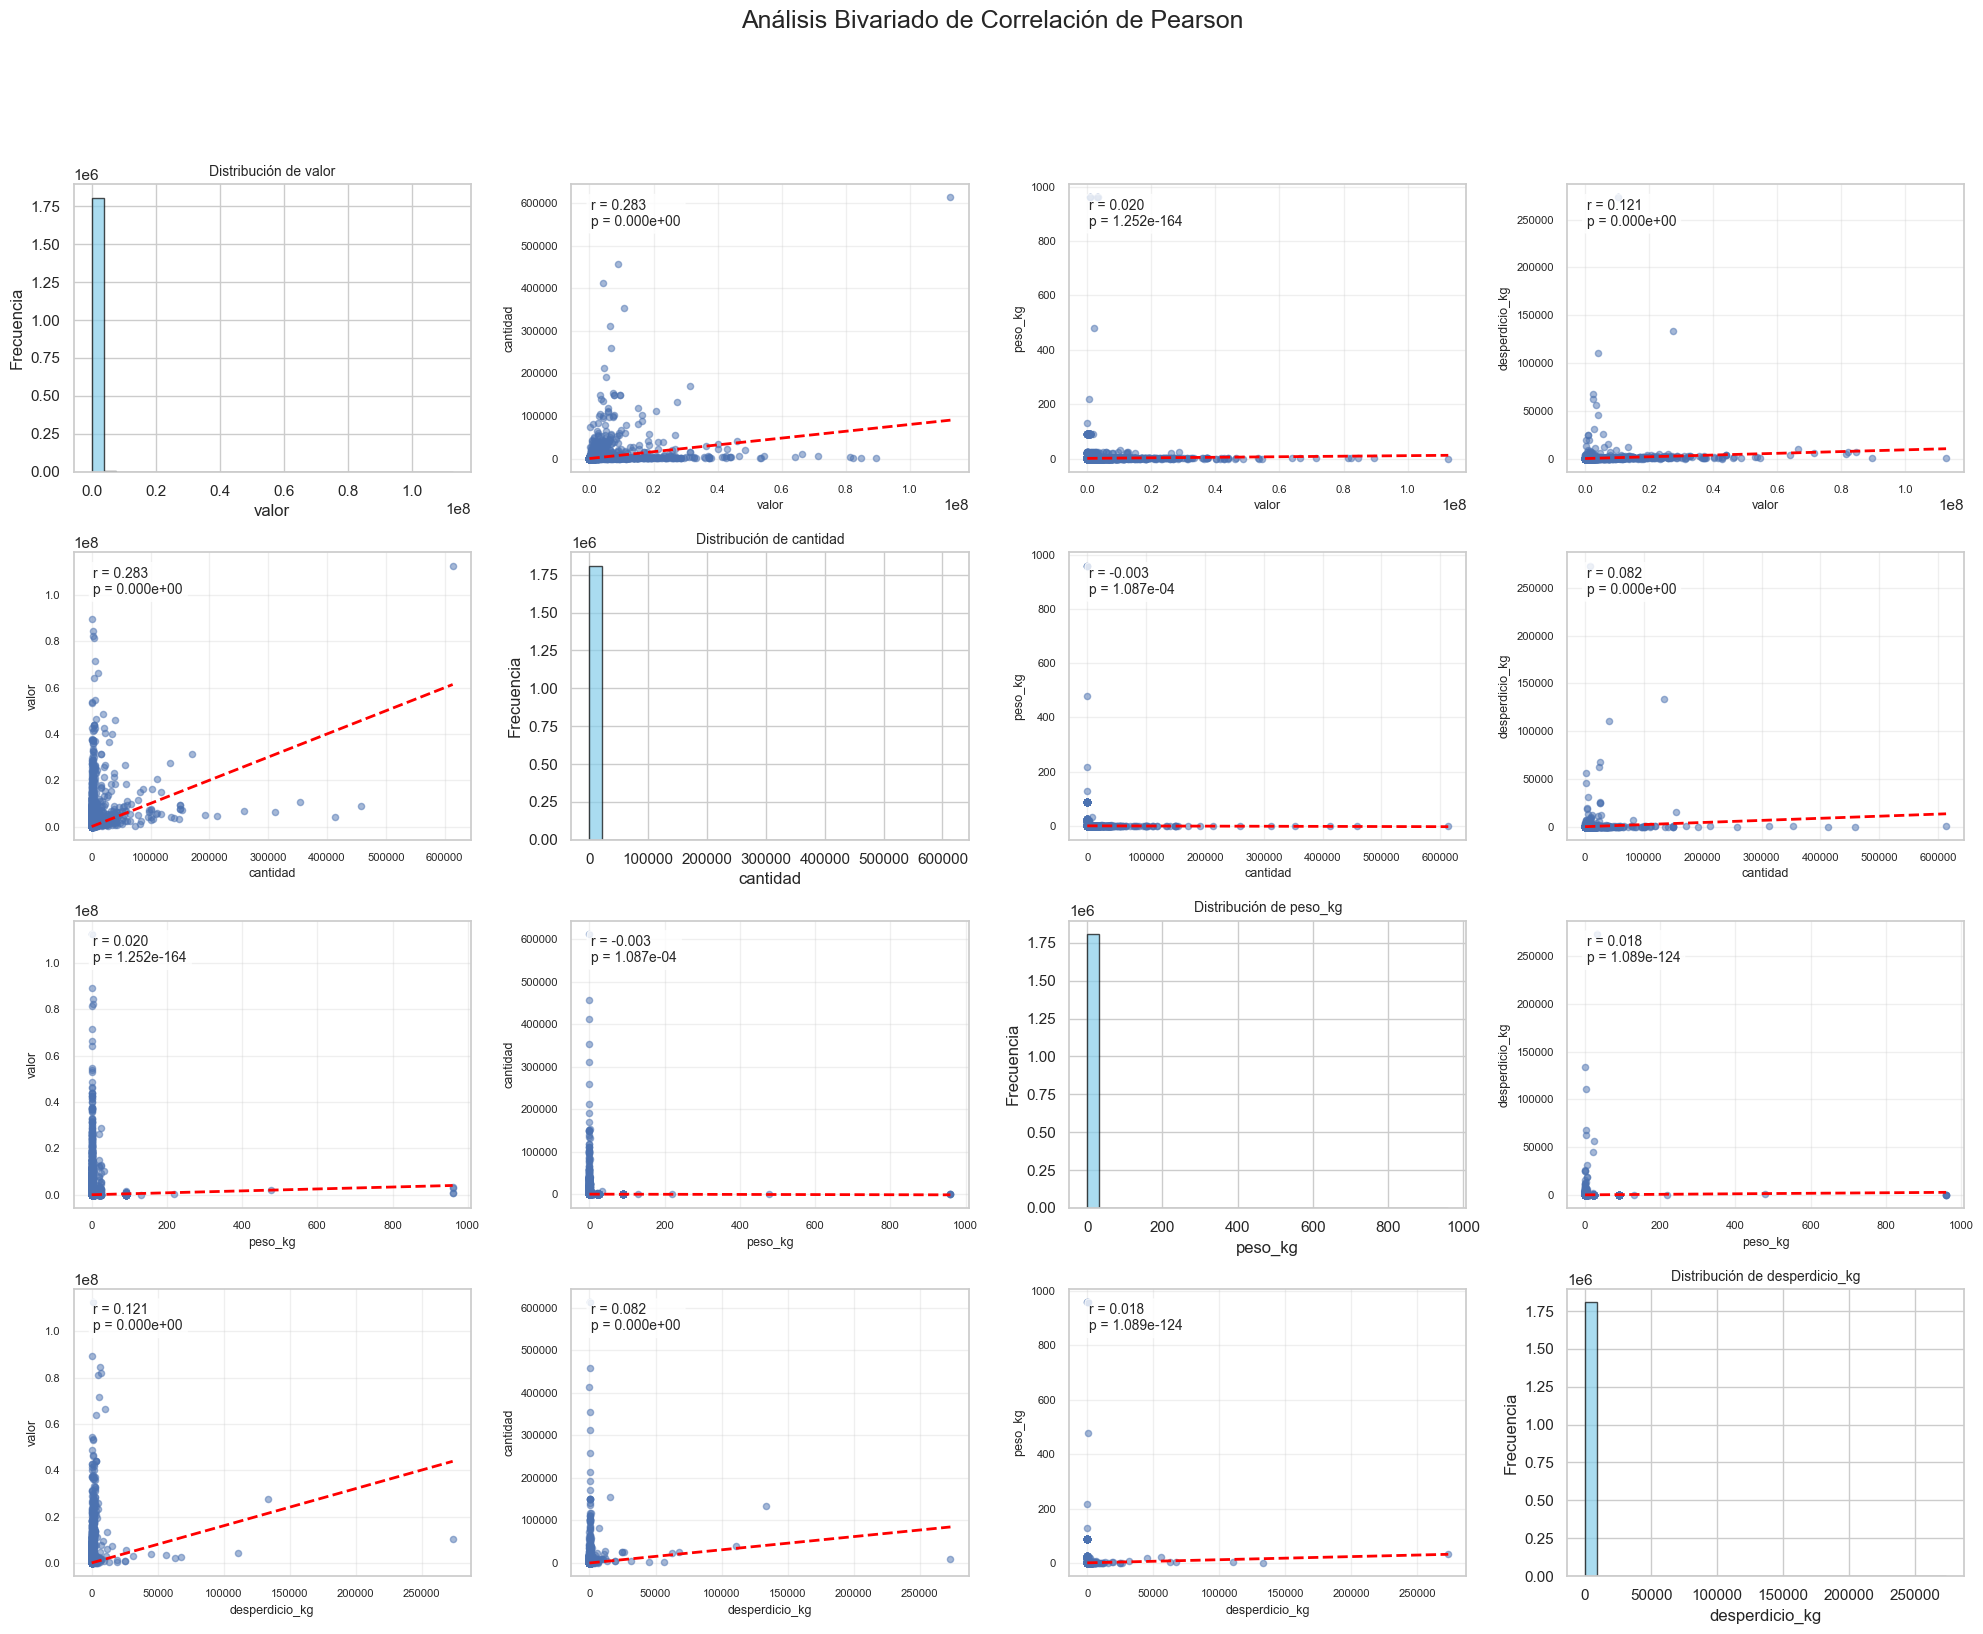

MATRIZ DE CORRELACIONES DE PEARSON

Número de registros utilizados: 1806869

Coeficientes de correlación (r):
                 valor  cantidad  peso_kg  desperdicio_kg
valor           1.0000    0.2828   0.0203          0.1208
cantidad        0.2828    1.0000  -0.0029          0.0824
peso_kg         0.0203   -0.0029   1.0000          0.0177
desperdicio_kg  0.1208    0.0824   0.0177          1.0000

Valores p (significancia estadística):
                valor  cantidad   peso_kg  desperdicio_kg
valor             0.0  0.000000  0.000000             0.0
cantidad          0.0  0.000000  0.000109             0.0
peso_kg           0.0  0.000109  0.000000             0.0
desperdicio_kg    0.0  0.000000  0.000000             0.0

INFORMACIÓN SOBRE DATOS FALTANTES
valor             0
cantidad          0
peso_kg           0
desperdicio_kg    0
dtype: int64

Registros completos (sin NaN): 1806869
Registros totales: 1806869
Porcentaje de datos completos: 100.00%


In [ ]:
# ================================
# ANÁLISIS BIVARIADO DE CORRELACIÓN DE PEARSON          
# ================================
# --- Variables a analizar ---
variables = ["valor", "cantidad", "peso_kg", "desperdicio_kg"]
n_vars = len(variables)

# --- Función para graficar scatter con correlación ---
def plot_correlation(ax, x, y, x_name, y_name, color="#4C72B0"):
    mask = ~np.isnan(x) & ~np.isnan(y)
    x_clean = x[mask]
    y_clean = y[mask]
    
    if len(x_clean) < 2:
        ax.text(0.5, 0.5, "Datos\ninsuficientes", 
                ha="center", va="center", fontsize=10,
                transform=ax.transAxes)
        ax.set_xlabel(x_name, fontsize=9)
        ax.set_ylabel(y_name, fontsize=9)
        ax.grid(True, alpha=0.3)
        return
    
    r, p_value = pearsonr(x_clean, y_clean)
    
    ax.scatter(x_clean, y_clean, alpha=0.5, color=color, s=20)
    
    # Línea de tendencia
    if len(x_clean) > 1 and not np.isnan(r):
        m, b = np.polyfit(x_clean, y_clean, 1)
        x_range = np.linspace(min(x_clean), max(x_clean), 100)
        ax.plot(x_range, m*x_range + b, color='red', linewidth=2, linestyle='--', label=f'r = {r:.3f}')
    
    ax.set_xlabel(x_name, fontsize=9)
    ax.set_ylabel(y_name, fontsize=9)
    ax.tick_params(labelsize=8)
    
    # Mostrar coeficiente y p-value
    ax.text(0.05, 0.95, f'r = {r:.3f}\np = {p_value:.3e}', 
            transform=ax.transAxes, fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
            verticalalignment='top')
    
    ax.grid(True, alpha=0.3)

# --- Crear subplots ---
fig, axes = plt.subplots(n_vars, n_vars, figsize=(20, 16))

# Título general, colocado por encima de los subplots
fig.suptitle('Análisis Bivariado de Correlación de Pearson', fontsize=18, y=1.02)

# --- Generar la matriz de scatter/histogramas ---
for i, var_x in enumerate(variables):
    for j, var_y in enumerate(variables):
        ax = axes[i, j]
        
        if i == j:
            # Diagonal: histograma
            data_hist = df_clean[var_x].dropna()
            ax.hist(data_hist, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
            ax.set_title(f'Distribución de {var_x}', fontsize=10)
            ax.set_xlabel(var_x)
            ax.set_ylabel('Frecuencia')
        else:
            # Scatter con correlación
            plot_correlation(ax, df_clean[var_x].values, df_clean[var_y].values, var_x, var_y)

# Ajustar márgenes para que no se superponga el título ni las etiquetas
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- Matriz numérica de correlación ---
df_corr = df_clean[variables].dropna()
corr_matrix = df_corr.corr()
p_values_matrix = pd.DataFrame(np.zeros((n_vars, n_vars)), columns=variables, index=variables)

for i, var1 in enumerate(variables):
    for j, var2 in enumerate(variables):
        if i != j:
            corr, p_val = pearsonr(df_corr[var1], df_corr[var2])
            p_values_matrix.loc[var1, var2] = p_val

print("="*60)
print("MATRIZ DE CORRELACIONES DE PEARSON")
print("="*60)
print(f"\nNúmero de registros utilizados: {len(df_corr)}")
print("\nCoeficientes de correlación (r):")
print(corr_matrix.round(4))
print("\nValores p (significancia estadística):")
print(p_values_matrix.round(6))

print("\n" + "="*60)
print("INFORMACIÓN SOBRE DATOS FALTANTES")
print("="*60)
missing_data = df_clean[variables].isnull().sum()
print(missing_data)
print(f"\nRegistros completos (sin NaN): {len(df_corr)}")
print(f"Registros totales: {len(df_clean)}")
print(f"Porcentaje de datos completos: {len(df_corr)/len(df_clean)*100:.2f}%")


🔹 Observaciones importantes:

Para el análisis de relaciones del data set completo se puede decir que todas las correlaciones son muy débiles, la más alta es r ≈ 0.28 entre valor y cantidad, esto indica que no hay relaciones lineales. fuertes entre las variables analizadas.

ANÁLISIS DE CORRELACIONES - DONACIONES


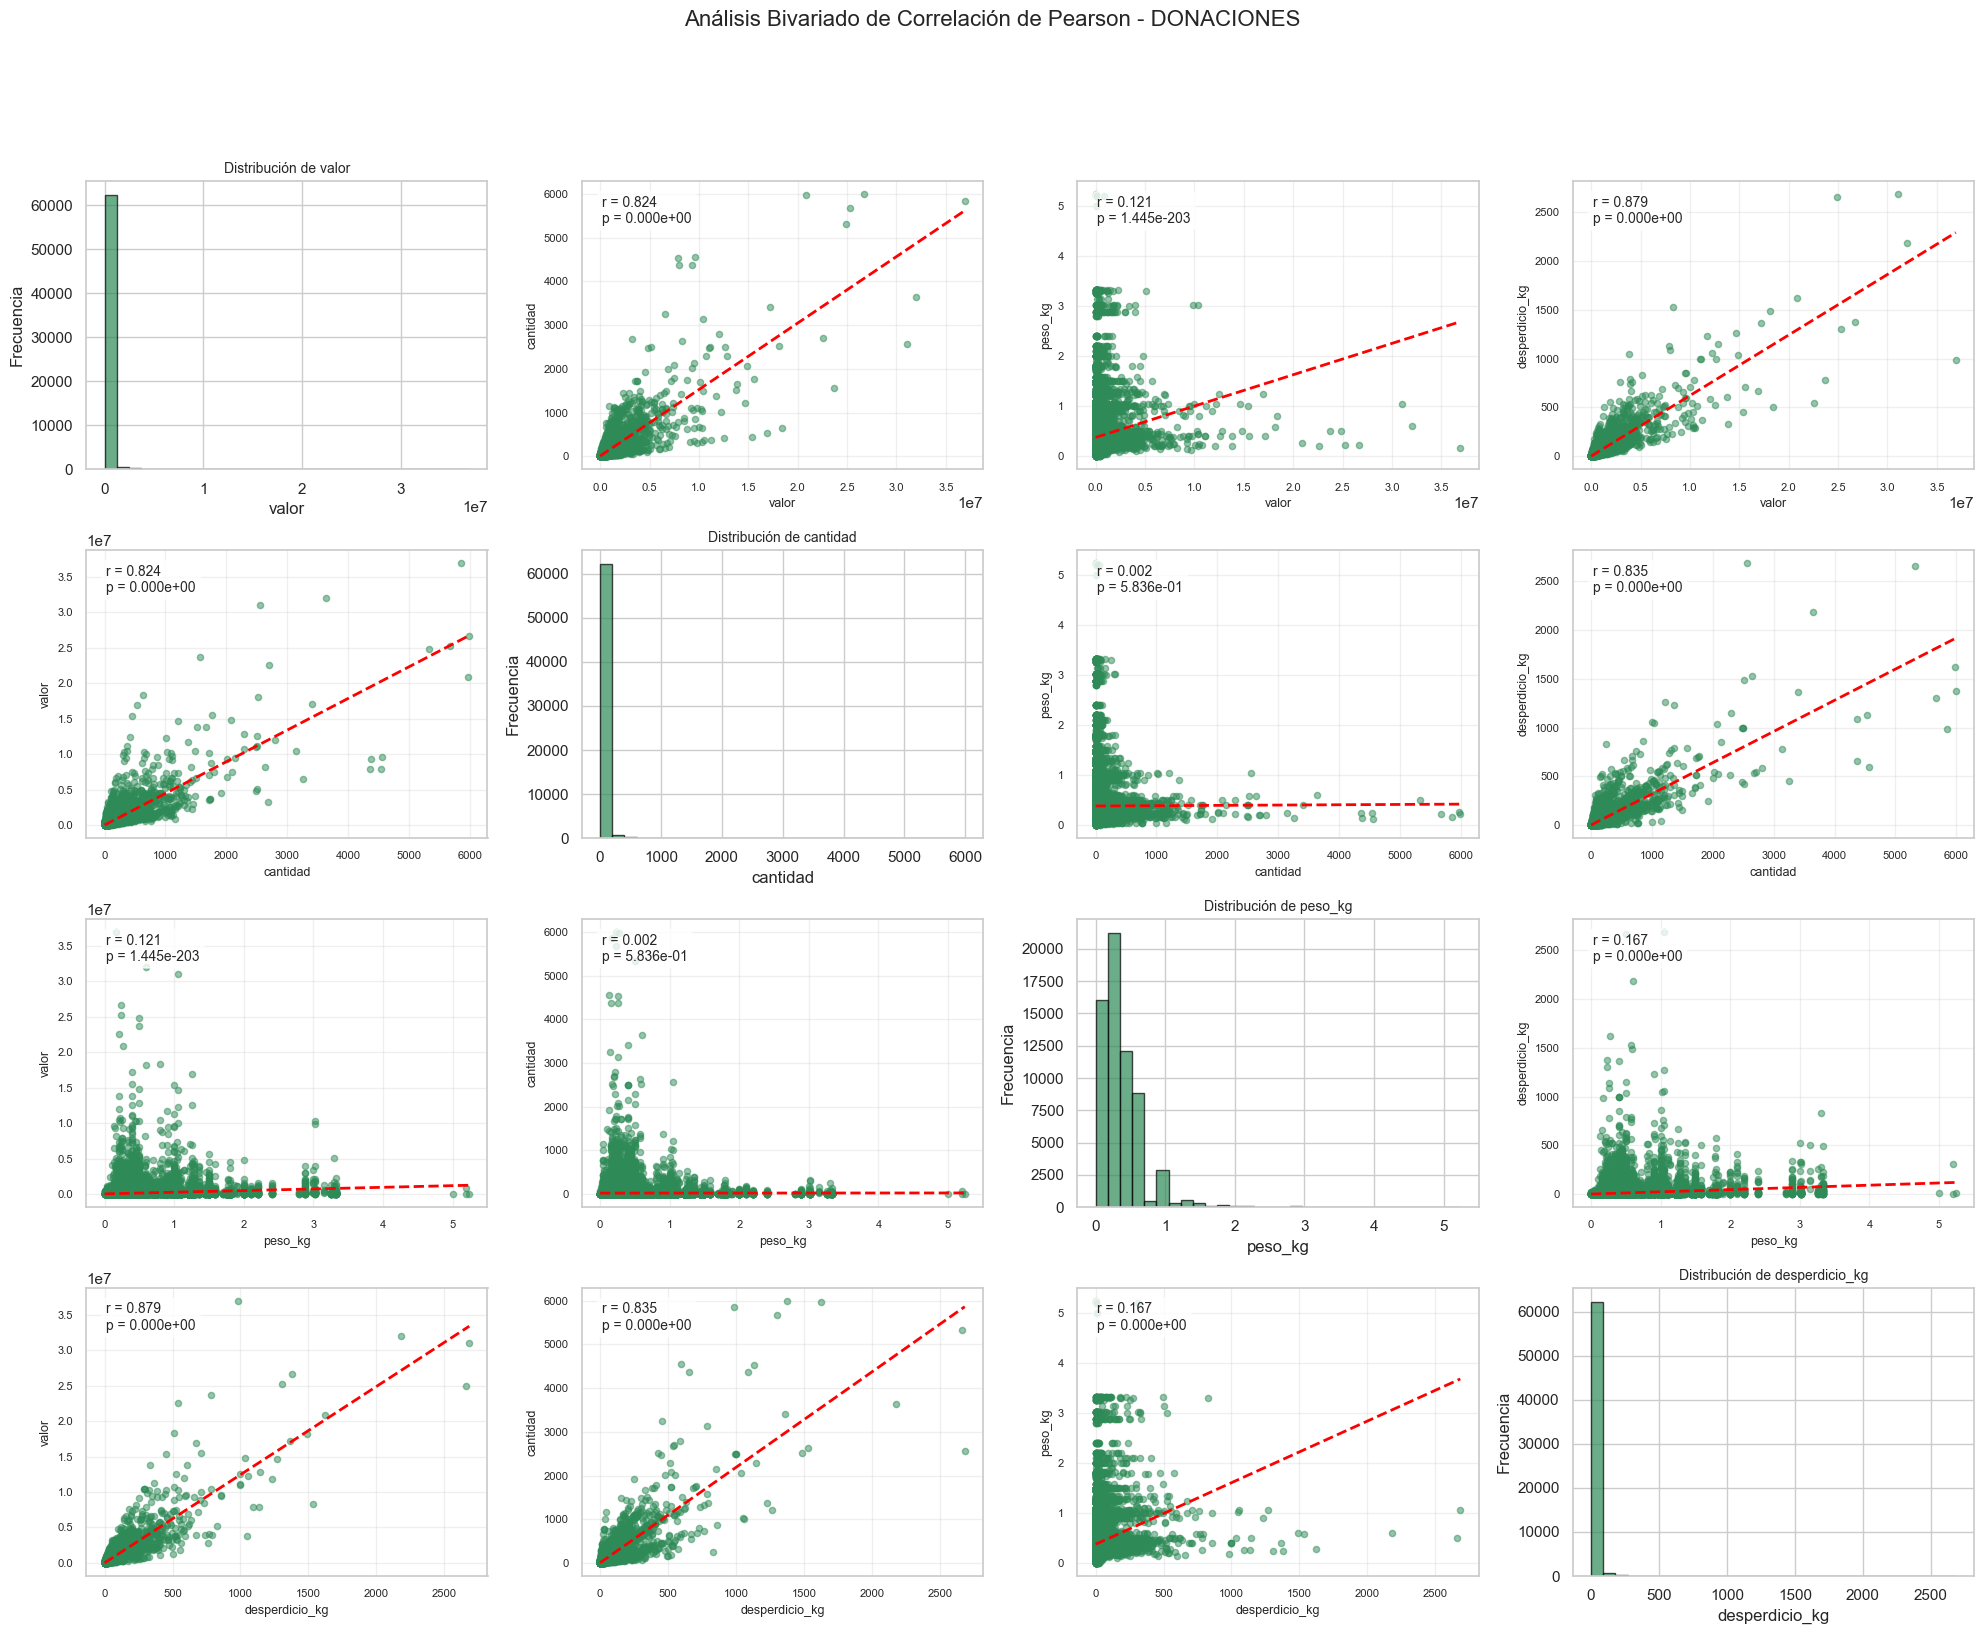


Coeficientes de correlación (r) - DONACIONES:
                 valor  cantidad  peso_kg  desperdicio_kg
valor           1.0000    0.8238   0.1205          0.8785
cantidad        0.8238    1.0000   0.0022          0.8355
peso_kg         0.1205    0.0022   1.0000          0.1674
desperdicio_kg  0.8785    0.8355   0.1674          1.0000

Valores p (significancia estadística) - DONACIONES:
                valor  cantidad   peso_kg  desperdicio_kg
valor             0.0  0.000000  0.000000             0.0
cantidad          0.0  0.000000  0.583645             0.0
peso_kg           0.0  0.583645  0.000000             0.0
desperdicio_kg    0.0  0.000000  0.000000             0.0

ANÁLISIS DE CORRELACIONES - DESTRUCCIONES


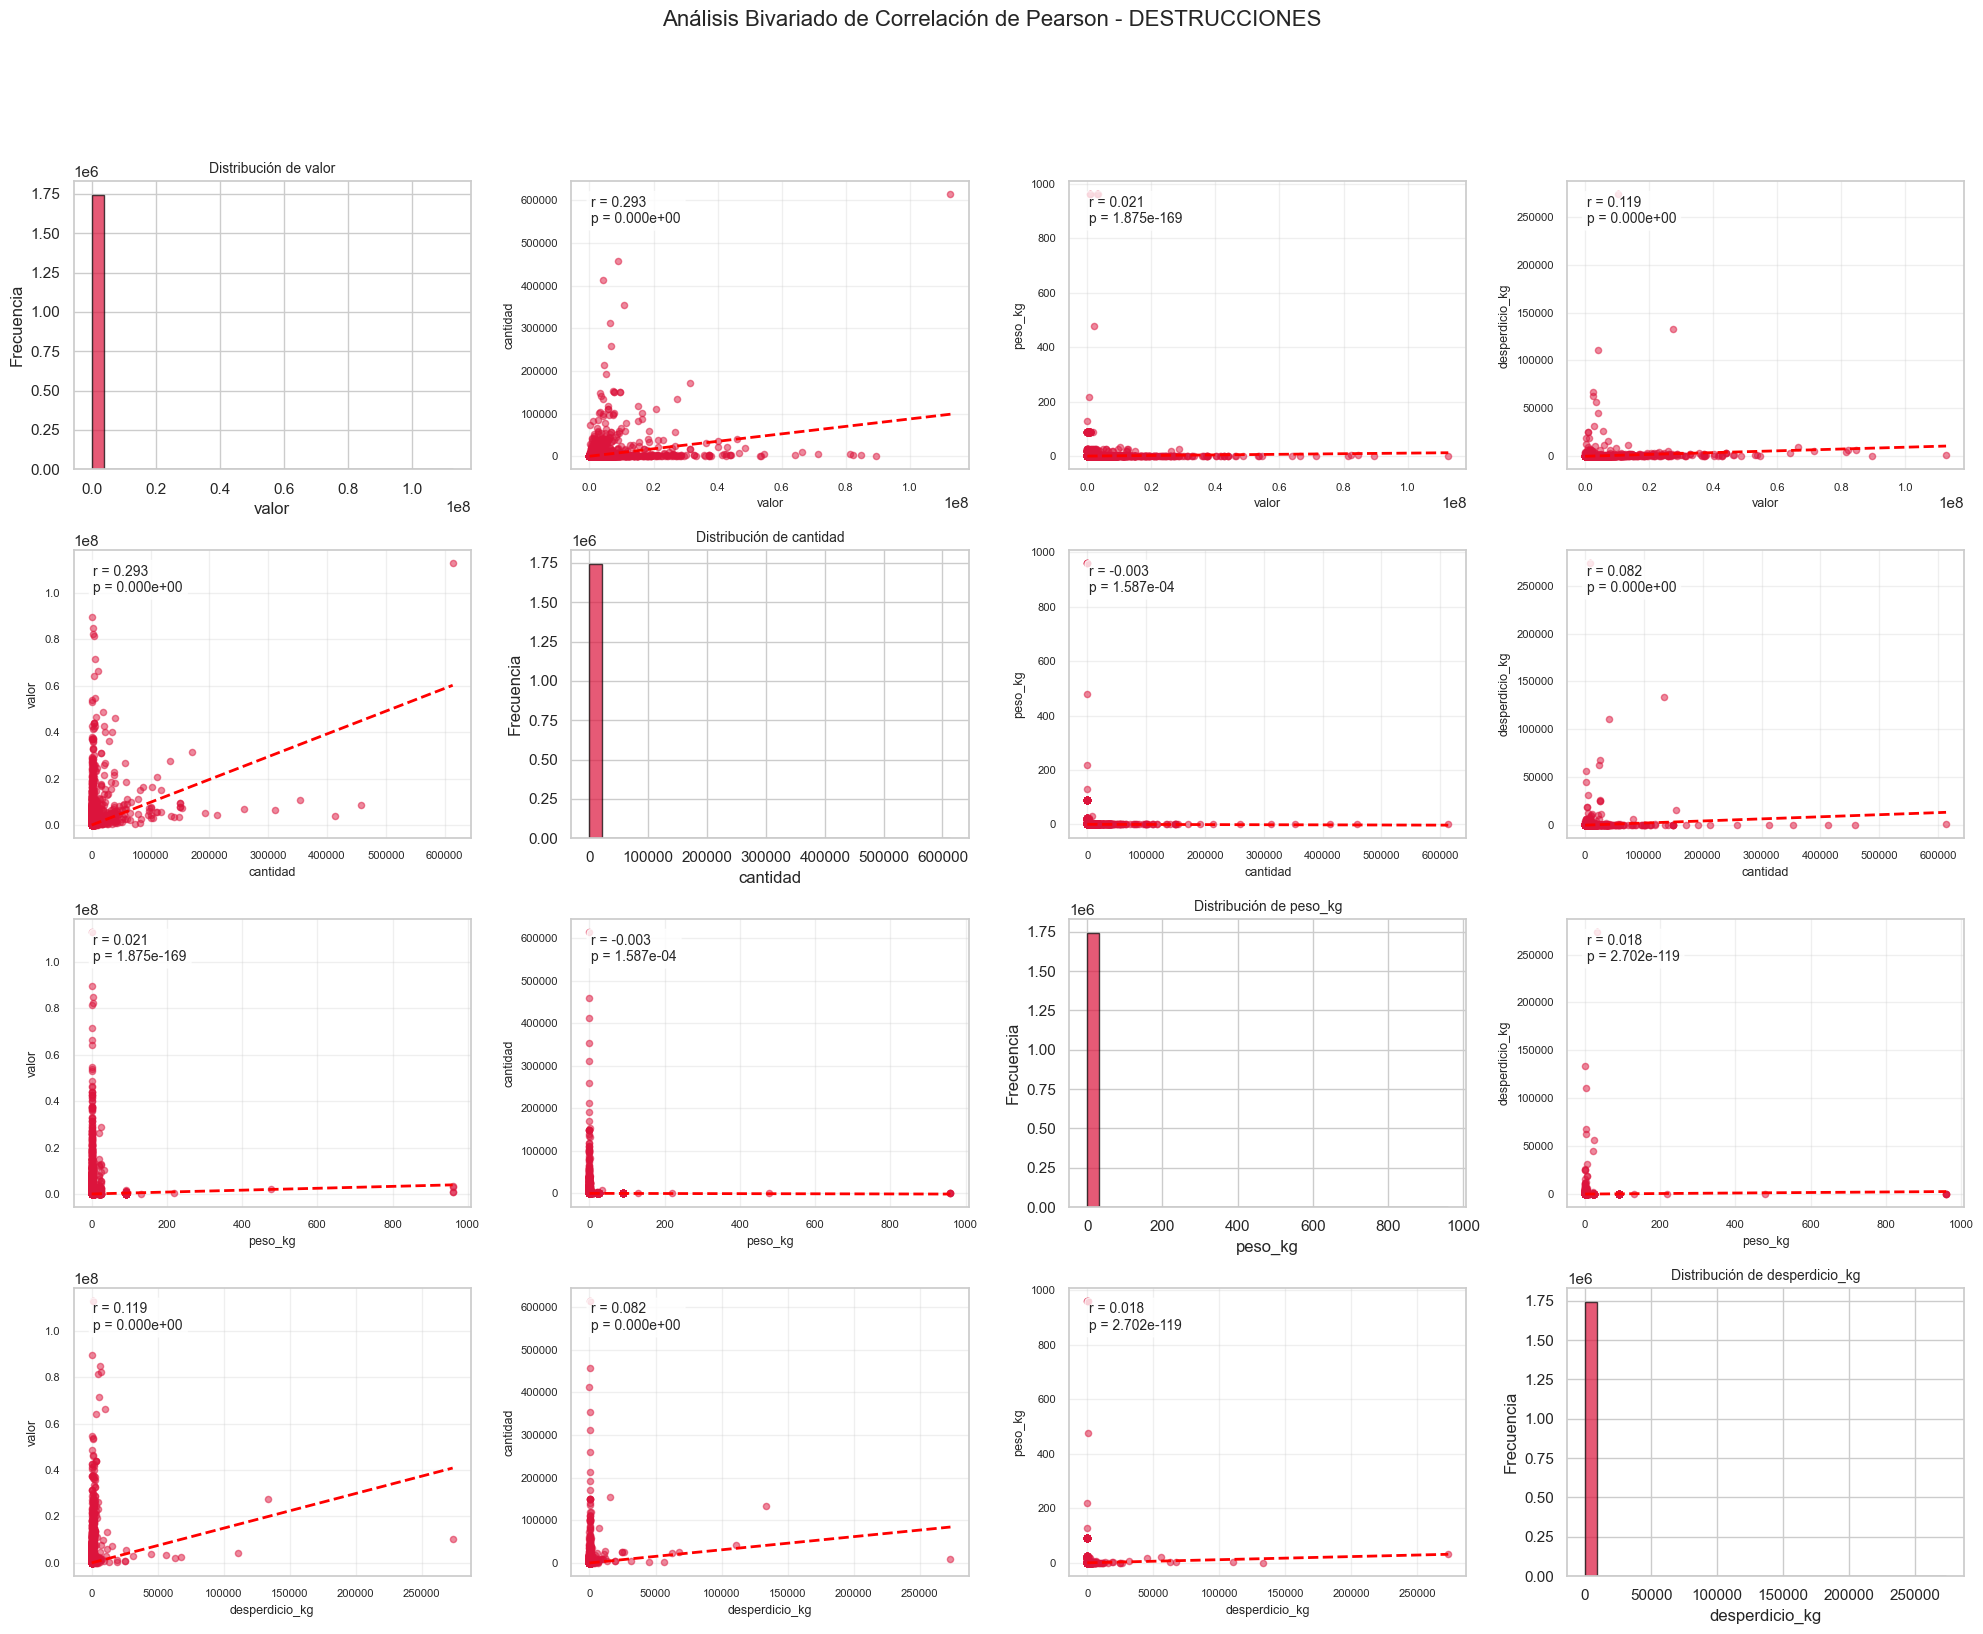


Coeficientes de correlación (r) - DESTRUCCIONES:
                 valor  cantidad  peso_kg  desperdicio_kg
valor           1.0000    0.2927   0.0210          0.1186
cantidad        0.2927    1.0000  -0.0029          0.0820
peso_kg         0.0210   -0.0029   1.0000          0.0176
desperdicio_kg  0.1186    0.0820   0.0176          1.0000

Valores p (significancia estadística) - DESTRUCCIONES:
                valor  cantidad   peso_kg  desperdicio_kg
valor             0.0  0.000000  0.000000             0.0
cantidad          0.0  0.000000  0.000159             0.0
peso_kg           0.0  0.000159  0.000000             0.0
desperdicio_kg    0.0  0.000000  0.000000             0.0


In [ ]:
# ================================
# ANÁLISIS BIVARIADO DE CORRELACIÓN DE PEARSON POR TIPO          
# ================================
# --- Configuración ---
variables = ["valor", "cantidad", "peso_kg", "desperdicio_kg"]
n_vars = len(variables)

# --- Filtrar datos por tipo ---
df_donacion = df_clean[df_clean['tipo'] == 'donacion']
df_destruccion = df_clean[df_clean['tipo'] == 'destruccion']

# --- Función para graficar cada par ---
def plot_correlation(ax, x, y, x_name, y_name, color):
    # Limpiar NaN
    mask = ~np.isnan(x) & ~np.isnan(y)
    x_clean = x[mask]
    y_clean = y[mask]
    
    if len(x_clean) < 2:
        ax.text(0.5, 0.5, "Datos\ninsuficientes", 
                ha="center", va="center", fontsize=10,
                transform=ax.transAxes)
        ax.set_xlabel(x_name, fontsize=9)
        ax.set_ylabel(y_name, fontsize=9)
        ax.grid(True, alpha=0.3)
        return

    r, p_value = pearsonr(x_clean, y_clean)
    
    ax.scatter(x_clean, y_clean, alpha=0.5, color=color, s=20)
    
    # Línea de tendencia
    try:
        m, b = np.polyfit(x_clean, y_clean, 1)
        x_range = np.linspace(min(x_clean), max(x_clean), 100)
        ax.plot(x_range, m*x_range + b, color='red', linewidth=2, linestyle='--', label=f'r = {r:.3f}')
    except:
        pass
    
    ax.set_xlabel(x_name, fontsize=9)
    ax.set_ylabel(y_name, fontsize=9)
    ax.tick_params(labelsize=8)
    ax.text(0.05, 0.95, f'r = {r:.3f}\np = {p_value:.3e}', 
            transform=ax.transAxes, fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
            verticalalignment='top')
    ax.grid(True, alpha=0.3)

# --- Función para crear gráfico completo ---
def crear_grafico_correlaciones(df, titulo, color):
    fig, axes = plt.subplots(n_vars, n_vars, figsize=(20, 16))
    
    # Título general, subido para que no se superponga
    fig.suptitle(titulo, fontsize=16, y=1.02)
    
    for i, var_x in enumerate(variables):
        for j, var_y in enumerate(variables):
            ax = axes[i, j]
            
            if i == j:
                ax.hist(df[var_x].dropna(), bins=30, color=color, alpha=0.7, edgecolor='black')
                ax.set_title(f'Distribución de {var_x}', fontsize=10)
                ax.set_xlabel(var_x)
                ax.set_ylabel('Frecuencia')
            else:
                plot_correlation(ax, df[var_x].values, df[var_y].values, var_x, var_y, color)
    
    # Ajustar márgenes para que no se superponga el título
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    
    return fig

# --- GRÁFICO 1: DONACIONES ---
print("=" * 60)
print("ANÁLISIS DE CORRELACIONES - DONACIONES")
print("=" * 60)

fig_donacion = crear_grafico_correlaciones(df_donacion, 
                                           'Análisis Bivariado de Correlación de Pearson - DONACIONES', 
                                           '#2E8B57')

# Matriz numérica de correlaciones para donaciones
corr_matrix_donacion = df_donacion[variables].corr()
p_values_matrix_donacion = pd.DataFrame(np.zeros((n_vars, n_vars)), columns=variables, index=variables)

for i, var1 in enumerate(variables):
    for j, var2 in enumerate(variables):
        if i != j:
            corr, p_val = pearsonr(df_donacion[var1].dropna(), df_donacion[var2].dropna())
            p_values_matrix_donacion.loc[var1, var2] = p_val

print("\nCoeficientes de correlación (r) - DONACIONES:")
print(corr_matrix_donacion.round(4))
print("\nValores p (significancia estadística) - DONACIONES:")
print(p_values_matrix_donacion.round(6))

# --- GRÁFICO 2: DESTRUCCIONES ---
print("\n" + "=" * 60)
print("ANÁLISIS DE CORRELACIONES - DESTRUCCIONES")
print("=" * 60)

fig_destruccion = crear_grafico_correlaciones(df_destruccion, 
                                              'Análisis Bivariado de Correlación de Pearson - DESTRUCCIONES', 
                                              '#DC143C')

# Matriz numérica de correlaciones para destrucciones
corr_matrix_destruccion = df_destruccion[variables].corr()
p_values_matrix_destruccion = pd.DataFrame(np.zeros((n_vars, n_vars)), columns=variables, index=variables)

for i, var1 in enumerate(variables):
    for j, var2 in enumerate(variables):
        if i != j:
            corr, p_val = pearsonr(df_destruccion[var1].dropna(), df_destruccion[var2].dropna())
            p_values_matrix_destruccion.loc[var1, var2] = p_val

print("\nCoeficientes de correlación (r) - DESTRUCCIONES:")
print(corr_matrix_destruccion.round(4))
print("\nValores p (significancia estadística) - DESTRUCCIONES:")
print(p_values_matrix_destruccion.round(6))


🔹 Observaciones importantes:

Para el caso de las donaciones se identifican correlaciones muy fuertes y positivas entre tres variables clave: valor-cantidad (r=0.82), valor-donación_kg (r=0.88) y cantidad-donación_kg (r=0.84). Estas relaciones son estadísticamente significativas (p<0.001), indicando que el valor económico, el volumen de items y el peso de donaciones varían de forma coordinada. Ratificando lo evidenciado anteriormente.

En caso contrario, el peso unitario (peso_kg) muestra escasa relación con las demás variables. Su correlación con cantidad es prácticamente nula (r=0.002) y estadísticamente no significativa (p=0.58), mientras que con valor y donación_kg presenta solo correlaciones débiles (r=0.12 y r=0.17 respectivamente), aunque significativas debido al gran tamaño muestral.

Este patrón sugiere que el valor de las donaciones se determina principalmente por el volumen y no por el peso individual de los items. La débil relación con peso_kg indica que los artículos donados probablemente incluyen mezclas de productos ligeros de alto valor y pesados de bajo valor, diluyendo cualquier patrón correlacional consistente.

La consistencia de las correlaciones fuertes entre valor, cantidad y donación_kg sugiere que estas variables podrían servir como proxies entre sí para fines de estimación y planificación operativa.

En el caso de las destrucciones, la correlación más fuerte se observa entre valor y cantidad (r ≈ 0.28), aunque sigue siendo débil, todas las demás correlaciones lineales son muy bajas (r < 0.13), lo que indica relaciones lineales casi nulas. Todos los valores p son prácticamente 0, lo que refleja alta significancia estadística debido al tamaño masivo de la muestra (~1.8 millones de registros). Es decir que las variables son casi independientes, y relaciones lineales simples no explican variaciones significativas entre ellas.

**_Análisis de correlación categórcias Cramér's V_**

Matriz de Correlación de Cramér's V:
              material    motivo  subcategoria  categoria    planta    centro  \
material      1.000000  0.307592      0.986704   0.962651  0.875162  0.337256   
motivo        0.307592  1.000000      0.248535   0.246636  0.204144  0.379752   
subcategoria  0.986704  0.248535      1.000000   0.966003  0.559134  0.319690   
categoria     0.962651  0.246636      0.966003   1.000000  0.580676  0.345838   
planta        0.875162  0.204144      0.559134   0.580676  1.000000  0.294802   
centro        0.337256  0.379752      0.319690   0.345838  0.294802  1.000000   
of_ventas     0.355733  0.327771      0.250676   0.214065  0.226722  0.841823   
linea         0.968051  0.183033      0.948434   0.965202  0.627179  0.221314   
marca         0.954302  0.225132      0.684630   0.689928  0.470664  0.338432   
demanda       0.941994  0.645334      0.540202   0.537266  0.413178  0.671929   
causales      0.317229  0.566776      0.162102   0.188340  0.268261  0.3

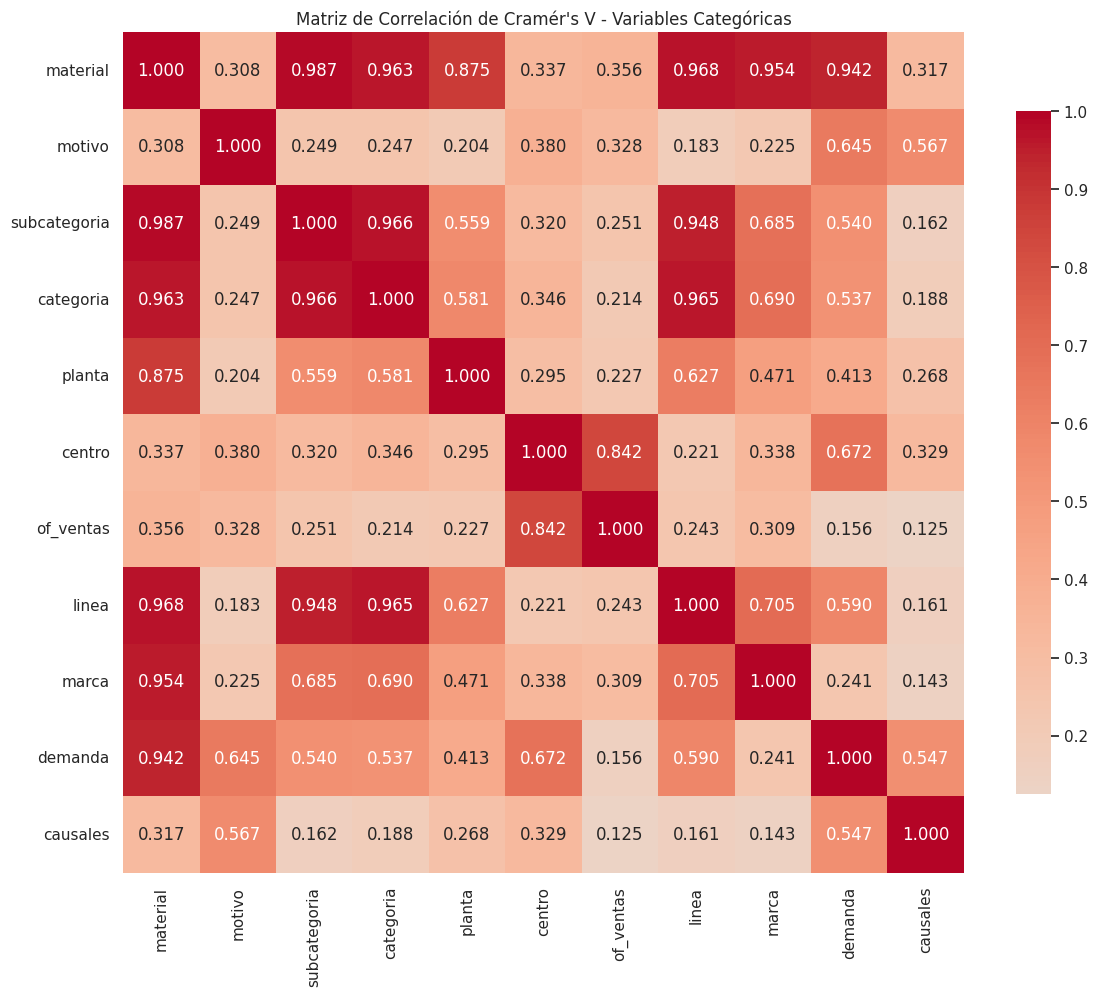


--- Correlaciones más fuertes (Cramér's V > 0.5) ---
material - subcategoria: 0.987
material - linea: 0.968
subcategoria - categoria: 0.966
categoria - linea: 0.965
material - categoria: 0.963
material - marca: 0.954
subcategoria - linea: 0.948
material - demanda: 0.942
material - planta: 0.875
centro - of_ventas: 0.842
linea - marca: 0.705
categoria - marca: 0.690
subcategoria - marca: 0.685
centro - demanda: 0.672
motivo - demanda: 0.645
planta - linea: 0.627
linea - demanda: 0.590
categoria - planta: 0.581
motivo - causales: 0.567
subcategoria - planta: 0.559
demanda - causales: 0.547
subcategoria - demanda: 0.540
categoria - demanda: 0.537

--- Resumen Estadístico ---
Correlación promedio: 0.471
Correlación máxima: 0.987
Correlación mínima: 0.125


In [107]:
# Calcular Cramér's V
def cramers_v(x, y):
    """
    Calcula el coeficiente de Cramér's V para dos variables categóricas
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Crear matriz de correlación de Cramér's V
def cramers_v_matrix(df, variables):
    """
    Crea una matriz de correlación usando Cramér's V
    """
    n_vars = len(variables)
    corr_matrix = np.ones((n_vars, n_vars))
    
    for i in range(n_vars):
        for j in range(i+1, n_vars):
            corr = cramers_v(df[variables[i]], df[variables[j]])
            corr_matrix[i, j] = corr
            corr_matrix[j, i] = corr
    
    return pd.DataFrame(corr_matrix, index=variables, columns=variables)

# Aplicar a tus variables específicas
variables_especificas = ['material', 'motivo', 'subcategoria', 'categoria', 'planta', 
                        'centro', 'of_ventas', 'linea', 'marca', 'demanda', 'causales']

# Calcular la matriz de correlación
correlation_matrix = cramers_v_matrix(df_clean, variables_especificas)

# Mostrar la matriz de correlación
print("Matriz de Correlación de Cramér's V:")
print(correlation_matrix)

# Opcional: Mostrar en formato de mapa de calor
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={'shrink': .8})
plt.title("Matriz de Correlación de Cramér's V - Variables Categóricas")
plt.tight_layout()
plt.show()

# Encontrar las correlaciones más fuertes
print("\n--- Correlaciones más fuertes (Cramér's V > 0.5) ---")
strong_correlations = []

for i in range(len(variables_especificas)):
    for j in range(i+1, len(variables_especificas)):
        var1 = variables_especificas[i]
        var2 = variables_especificas[j]
        corr_value = correlation_matrix.loc[var1, var2]
        if corr_value > 0.5:
            strong_correlations.append((var1, var2, corr_value))

# Ordenar por correlación descendente
strong_correlations.sort(key=lambda x: x[2], reverse=True)

for var1, var2, corr in strong_correlations:
    print(f"{var1} - {var2}: {corr:.3f}")

# Resumen estadístico
print(f"\n--- Resumen Estadístico ---")
print(f"Correlación promedio: {correlation_matrix.values[np.triu_indices_from(correlation_matrix, k=1)].mean():.3f}")
print(f"Correlación máxima: {correlation_matrix.values[np.triu_indices_from(correlation_matrix, k=1)].max():.3f}")
print(f"Correlación mínima: {correlation_matrix.values[np.triu_indices_from(correlation_matrix, k=1)].min():.3f}")

De acuerdo a los resultados de este análisis, la necesidad de disminuír la dimensionalidad y las correlaciones arrojadas, se decide prescindir de causales, motivo, of_ventas, centro por su baja correlación con las demás variables. Agregando que estas variable podrían ser correspondidas por otras.

Matriz de Correlación de Cramér's V:
              material  subcategoria  categoria    planta     linea     marca  \
material      1.000000      0.986704   0.962651  0.875162  0.968051  0.954302   
subcategoria  0.986704      1.000000   0.966003  0.559134  0.948434  0.684630   
categoria     0.962651      0.966003   1.000000  0.580676  0.965202  0.689928   
planta        0.875162      0.559134   0.580676  1.000000  0.627179  0.470664   
linea         0.968051      0.948434   0.965202  0.627179  1.000000  0.704538   
marca         0.954302      0.684630   0.689928  0.470664  0.704538  1.000000   
demanda       0.941994      0.540202   0.537266  0.413178  0.589898  0.241376   

               demanda  
material      0.941994  
subcategoria  0.540202  
categoria     0.537266  
planta        0.413178  
linea         0.589898  
marca         0.241376  
demanda       1.000000  


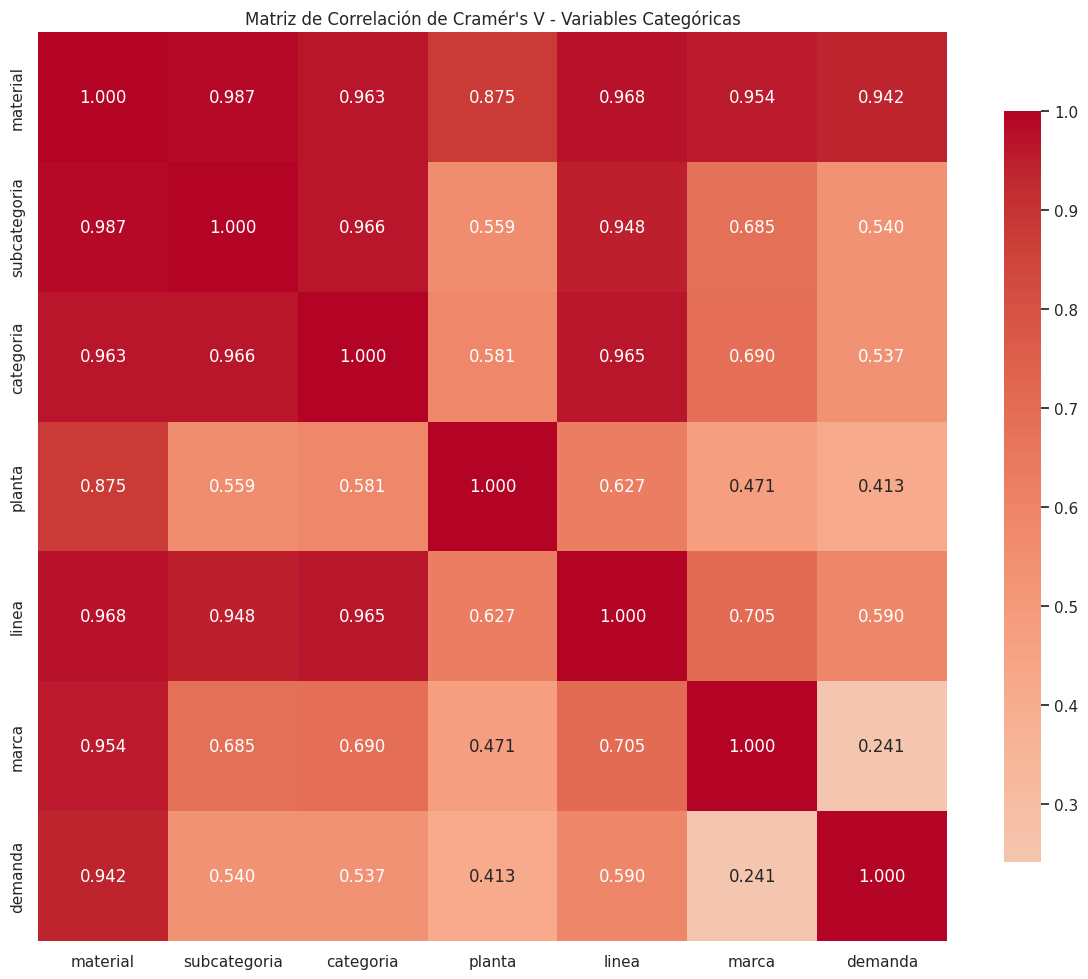


--- Correlaciones más fuertes (Cramér's V > 0.5) ---
material - subcategoria: 0.987
material - linea: 0.968
subcategoria - categoria: 0.966
categoria - linea: 0.965
material - categoria: 0.963
material - marca: 0.954
subcategoria - linea: 0.948
material - demanda: 0.942
material - planta: 0.875
linea - marca: 0.705
categoria - marca: 0.690
subcategoria - marca: 0.685
planta - linea: 0.627
linea - demanda: 0.590
categoria - planta: 0.581
subcategoria - planta: 0.559
subcategoria - demanda: 0.540
categoria - demanda: 0.537

--- Resumen Estadístico ---
Correlación promedio: 0.724
Correlación máxima: 0.987
Correlación mínima: 0.241


In [ ]:
#3===============================
# ANÁLISIS BIVARIADO DE CORRELACIÓN DE CRAMÉR'S V CON LAS VARIABLES ELIMINADAS          
# ================================
# Calcular Cramér's V
def cramers_v(x, y):
    """
    Calcula el coeficiente de Cramér's V para dos variables categóricas
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Crear matriz de correlación de Cramér's V
def cramers_v_matrix(df, variables):
    """
    Crea una matriz de correlación usando Cramér's V
    """
    n_vars = len(variables)
    corr_matrix = np.ones((n_vars, n_vars))
    
    for i in range(n_vars):
        for j in range(i+1, n_vars):
            corr = cramers_v(df[variables[i]], df[variables[j]])
            corr_matrix[i, j] = corr
            corr_matrix[j, i] = corr
    
    return pd.DataFrame(corr_matrix, index=variables, columns=variables)

# Aplicar a tus variables específicas
variables_especificas = ['material', 'subcategoria', 'categoria', 'planta', 
                        'linea', 'marca', 'demanda']

# Calcular la matriz de correlación
correlation_matrix = cramers_v_matrix(df_clean, variables_especificas)

# Mostrar la matriz de correlación
print("Matriz de Correlación de Cramér's V:")
print(correlation_matrix)

# Opcional: Mostrar en formato de mapa de calor
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={'shrink': .8})
plt.title("Matriz de Correlación de Cramér's V - Variables Categóricas")
plt.tight_layout()
plt.show()

# Encontrar las correlaciones más fuertes
print("\n--- Correlaciones más fuertes (Cramér's V > 0.5) ---")
strong_correlations = []

for i in range(len(variables_especificas)):
    for j in range(i+1, len(variables_especificas)):
        var1 = variables_especificas[i]
        var2 = variables_especificas[j]
        corr_value = correlation_matrix.loc[var1, var2]
        if corr_value > 0.5:
            strong_correlations.append((var1, var2, corr_value))

# Ordenar por correlación descendente
strong_correlations.sort(key=lambda x: x[2], reverse=True)

for var1, var2, corr in strong_correlations:
    print(f"{var1} - {var2}: {corr:.3f}")

# Resumen estadístico
print(f"\n--- Resumen Estadístico ---")
print(f"Correlación promedio: {correlation_matrix.values[np.triu_indices_from(correlation_matrix, k=1)].mean():.3f}")
print(f"Correlación máxima: {correlation_matrix.values[np.triu_indices_from(correlation_matrix, k=1)].max():.3f}")
print(f"Correlación mínima: {correlation_matrix.values[np.triu_indices_from(correlation_matrix, k=1)].min():.3f}")

Si bien, hay correlaciones bajas como demanda-marca, se visualiza un conjunto de variables importantes para el análisis y con el propósito de aportar a la correlación de entre variables, para la construcción de un futuro modelo.

In [ ]:
# ================================
# CREAR NUEVO DATAFRAME SIN COLUMNAS ESPECÍFICAS
# ================================
# Columnas a eliminar
columnas_eliminar = ['causales', 'motivo', 'of_ventas', 'centro']

# Crear nuevo DataFrame sin esas columnas
df_nclean = df_clean.drop(columns=columnas_eliminar)

# Revisar que se hayan eliminado
print(df_nclean.head())
print("\nColumnas actuales:", df_nclean.columns.tolist())


        fecha  material  cantidad  valor  peso_kg  desperdicio_kg    planta  \
0  2025-06-05   2031253         2   4904     0.12           0.240  medellin   
1  2025-06-05   1075038         5  20855     0.45           2.250  medellin   
2  2025-06-05   2011706         2   4810     0.24           0.482  comprado   
3  2025-06-06   1079335         4  67884     0.50           2.000  envigado   
4  2025-06-06   1000571        14  27874     0.25           3.500  medellin   

              categoria          subcategoria            linea     marca  \
0  alimentos larga vida                   NaN             atun      zenu   
1          carnes frias                   NaN        mortadela     cunit   
2  alimentos larga vida  larga vida vegetales  maiz larga vida      zenu   
3        carnes frescas                   NaN            cerdo  ranchera   
4          carnes frias               tajados        mortadela      zenu   

        demanda         tipo                           nombre_materi

# *Análisis Multivariado*

Para el análisis multivariado se decide realizar Clúster, dado que las técnicas propuestas no son aptas para el tipo de datos que se estudia, por ejemplo:

- Análisis por Componentes PCA, solamente se cuenta con 4 variables continuas de 16 variables, y reducir su dimensionalidad no contribuiría en el análisis.
- Regresión lineal múltiple, ya que en los análisis anteriores, se evidencia que incumplen con al menos uno de los supuestos, los datos no se comportan normales y no son independientes.

Número de registros de destruccion: 1743381
Registros después de eliminar valores nulos: 1743381
Tamaño de la muestra para clustering: 100000
Porcentaje de datos originales utilizados: 5.74%


100%|██████████| 9/9 [15:48<00:00, 105.43s/it]


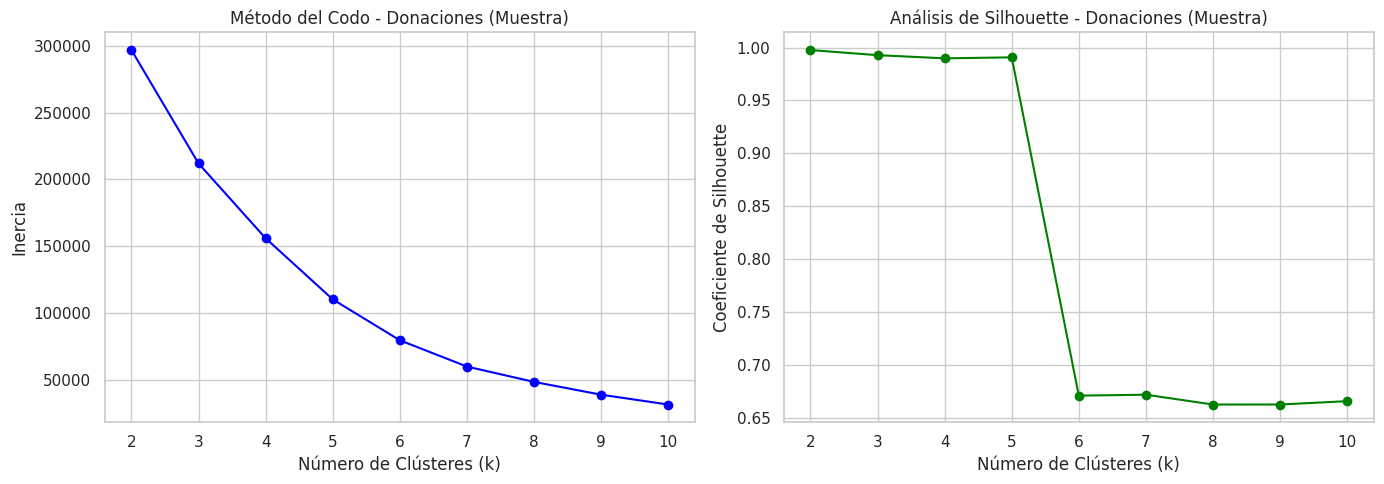

Número óptimo de clústeres sugerido: 2

Aplicando modelo a toda la data de destrucciones...

Número de clústeres utilizados: 2
Distribución de registros por clúster:
cluster_kmeans_destrucciones
0.0    1743374
1.0          7
Name: count, dtype: int64

Generando visualizaciones con muestra...


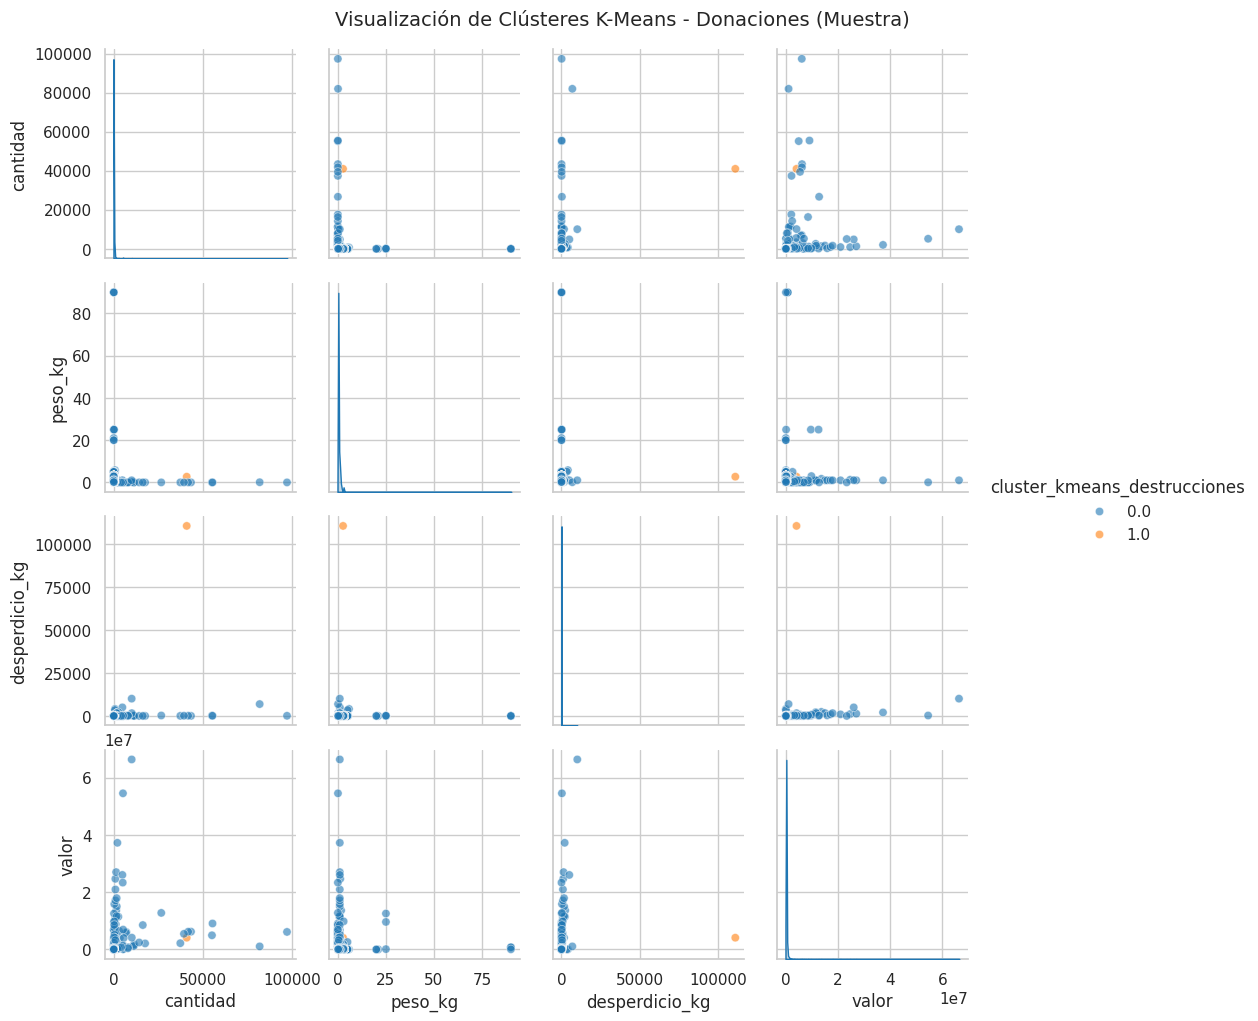


Promedio de variables por clúster (todos los datos):


cantidad   peso_kg  desperdicio_kg  \
cluster_kmeans_destrucciones                                            
0.0                               15.368069  0.593561        3.829464   
1.0                           186078.428571  5.948571    92638.813849   

                                     valor  
cluster_kmeans_destrucciones                
0.0                           4.422706e+04  
1.0                           2.403031e+07


Resumen del análisis:
- Total de registros de destrucciones: 1,743,381
- Registros utilizados en el clustering: 1,743,381
- Muestra para optimización: 100,000
- Variables analizadas: ['cantidad', 'peso_kg', 'desperdicio_kg', 'valor']


In [ ]:
# ===========================================
# Análisis de Clúster con K-Means para Destrucciones (MUESTREO)
# ===========================================

# Configuración de estilo gráfico
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.family'] = 'DejaVu Sans'

# --- Filtrar solo registros de destruccion ---
df_dstrucciones = df_nclean[df_nclean['tipo'] == 'destruccion'].copy()
print(f"Número de registros de destruccion: {len(df_dstrucciones)}")

# --- Seleccionar variables numéricas y eliminar nulos ---
variables = ['cantidad', 'peso_kg', 'desperdicio_kg', 'valor']
df_completo = df_dstrucciones[variables].dropna()
print(f"Registros después de eliminar valores nulos: {len(df_completo)}")

# --- MUESTREO: Tomar hasta 100,000 registros ---
tamaño_muestra = min(100000, len(df_completo)) 
df_cluster = df_completo.sample(n=tamaño_muestra, random_state=42)

print(f"Tamaño de la muestra para clustering: {len(df_cluster)}")
print(f"Porcentaje de datos originales utilizados: {len(df_cluster)/len(df_completo)*100:.2f}%")

# --- Estandarización ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# --- Determinar número óptimo de clústeres ---
inertia = []
silhouette = []
K = range(2, 11)

for k in tqdm(K):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    if k > 1:
        silhouette.append(silhouette_score(X_scaled, kmeans.labels_))
    else:
        silhouette.append(0)

# --- Gráficas de evaluación ---
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(K, inertia, 'o-', color='blue')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo - Donaciones (Muestra)')

plt.subplot(1,2,2)
plt.plot(K, silhouette, 'o-', color='green')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Análisis de Silhouette - Donaciones (Muestra)')

plt.tight_layout()
plt.show()

# --- Determinar k óptimo ---
k_optimo = K[np.argmax(silhouette)]
print(f"Número óptimo de clústeres sugerido: {k_optimo}")

# --- Ajuste final del modelo con toda la data ---
print("\nAplicando modelo a toda la data de destrucciones...")
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)

# Ajustar con la muestra
kmeans_final.fit(X_scaled)

# Predecir para TODOS los registros (escalados)
X_full_scaled = scaler.transform(df_completo)
cluster_labels_full = kmeans_final.predict(X_full_scaled)

# Asignar clusters a todos los registros
df_dstrucciones.loc[df_completo.index, 'cluster_kmeans_destrucciones'] = cluster_labels_full

# --- Resultados ---
print(f"\nNúmero de clústeres utilizados: {k_optimo}")
print("Distribución de registros por clúster:")
print(df_dstrucciones['cluster_kmeans_destrucciones'].value_counts().sort_index())

# --- Visualización con muestra ---
print("\nGenerando visualizaciones con muestra...")
df_muestra_viz = df_dstrucciones.loc[df_cluster.index].copy()

# Pairplot con muestra
sns.pairplot(df_muestra_viz, vars=variables, hue='cluster_kmeans_destrucciones', 
             palette='tab10', plot_kws={'alpha': 0.6})
plt.suptitle('Visualización de Clústeres K-Means - Destrucciones (Muestra)', y=1.02, fontsize=14)
plt.show()

# --- Estadísticas con todos los datos ---
cluster_summary = df_dstrucciones.groupby('cluster_kmeans_destrucciones')[variables].mean()
print("\nPromedio de variables por clúster (todos los datos):")
display(cluster_summary)

# --- Información final ---
print(f"\nResumen del análisis:")
print(f"- Total de registros de destrucciones: {len(df_dstrucciones):,}")
print(f"- Registros utilizados en el clustering: {len(df_completo):,}")
print(f"- Muestra para optimización: {len(df_cluster):,}")
print(f"- Variables analizadas: {variables}")


Para específicamente las destrucciones, no hay evidencia suficente para visualizar una diferenciación en agrupamientos, puede ser por ser una data muy grande y tener una muestra muy pequeña. Pero en este caso puntual, los clúster no siguen ningún patrón evidente. 

Número de registros de donaciones: 63340
Registros después de eliminar valores nulos: 63340


100%|██████████| 9/9 [06:26<00:00, 42.97s/it]


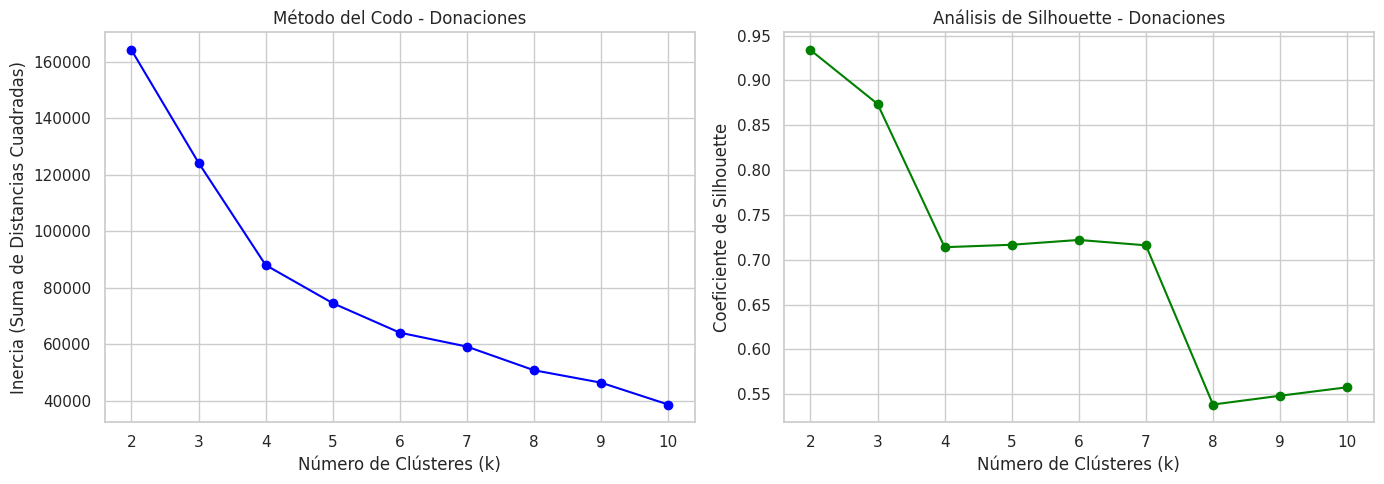

Número óptimo de clústeres sugerido: 2

Número de clústeres utilizados: 2
Distribución de registros por clúster:
cluster_kmeans_donaciones
0.0    63060
1.0      280
Name: count, dtype: int64


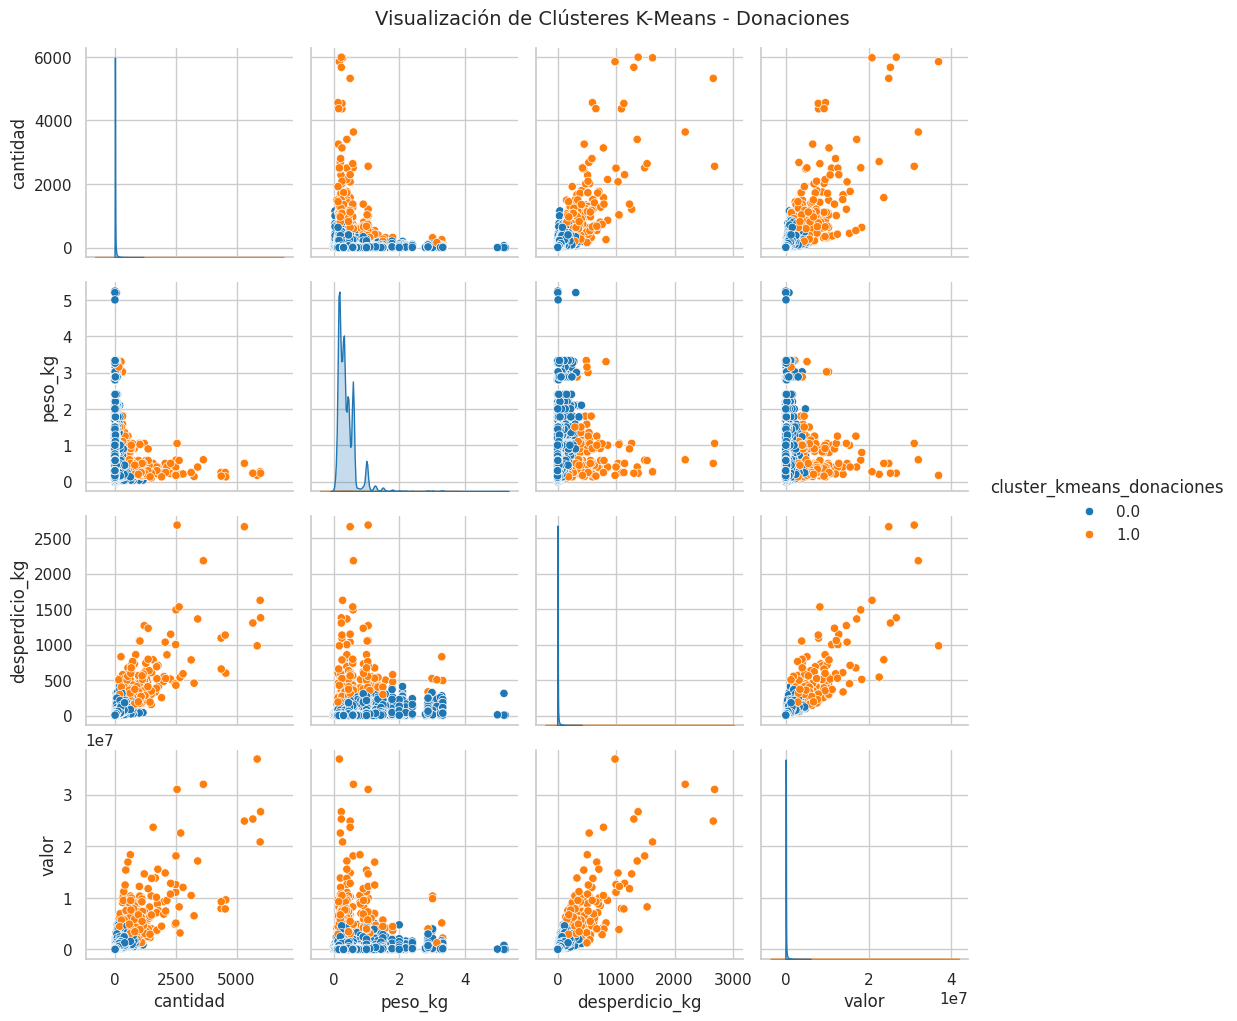


Promedio de variables por clúster:


cantidad   peso_kg  desperdicio_kg         valor
cluster_kmeans_donaciones                                                     
0.0                          16.715937  0.382815        6.383646  8.794250e+04
1.0                        1117.196429  0.571036      447.401107  6.162296e+06


Estadísticas descriptivas por clúster:


cantidad                          peso_kg  \
                                  mean         std  min   max      mean   
cluster_kmeans_donaciones                                                 
0.0                          16.715937   49.733371    0  1155  0.382815   
1.0                        1117.196429  962.728970  116  5990  0.571036   

                                               desperdicio_kg              \
                                std  min   max           mean         std   
cluster_kmeans_donaciones                                                   
0.0                        0.305594  0.0  5.24       6.383646   19.629011   
1.0                        0.531062  0.1  3.33     447.401107  337.108167   

                                                      valor                \
                             min          max          mean           std   
cluster_kmeans_donaciones                                                   
0.0                          0.0   409.109985  8.794250e+04  2.698563e+05   
1.0                        120.0  2684.850000  6.162296e+06  5.073223e+06   

                                              
                               min       max  
cluster_kmeans_donaciones                     
0.0                             22   5932170  
1.0                        1281280  36913500


Resumen del análisis:
- Total de registros de donaciones: 63340
- Registros utilizados en el clustering: 63340
- Variables analizadas: ['cantidad', 'peso_kg', 'desperdicio_kg', 'valor']


In [67]:
# ===========================================
# Análisis de Clúster con K-Means para Donaciones
# ===========================================

# Configuración de estilo gráfico
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.family'] = 'DejaVu Sans'

# --- Filtrar solo registros de donaciones ---
df_donaciones = df_clean[df_nclean['tipo'] == 'donacion'].copy()

print(f"Número de registros de donaciones: {len(df_donaciones)}")

# --- Seleccionar variables numéricas ---
variables = ['cantidad', 'peso_kg', 'desperdicio_kg', 'valor']
df_cluster = df_donaciones[variables].dropna()

print(f"Registros después de eliminar valores nulos: {len(df_cluster)}")

# Verificar que hay suficientes datos para el análisis
if len(df_cluster) < 2:
    print("Error: No hay suficientes datos para realizar el análisis de clústeres")
else:
    # --- Estandarización ---
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_cluster)

    # --- Determinar número óptimo de clústeres (Método del codo y silhouette) ---
    inertia = []
    silhouette = []
    K = range(2, min(11, len(df_cluster)))  # Asegurar que k no exceda el número de muestras

    for k in tqdm(K):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)
        if k > 1:  # silhouette_score requiere al menos 2 clusters
            silhouette.append(silhouette_score(X_scaled, kmeans.labels_))
        else:
            silhouette.append(0)

    # --- Gráfica del método del codo ---
    plt.figure(figsize=(14,5))

    plt.subplot(1,2,1)
    plt.plot(K, inertia, 'o-', color='blue')
    plt.xlabel('Número de Clústeres (k)')
    plt.ylabel('Inercia (Suma de Distancias Cuadradas)')
    plt.title('Método del Codo - Donaciones')

    # --- Gráfica del silhouette ---
    plt.subplot(1,2,2)
    plt.plot(K, silhouette, 'o-', color='green')
    plt.xlabel('Número de Clústeres (k)')
    plt.ylabel('Coeficiente de Silhouette')
    plt.title('Análisis de Silhouette - Donaciones')

    plt.tight_layout()
    plt.show()

    # --- Determinar k óptimo basado en silhouette score ---
    k_optimo = K[np.argmax(silhouette)] if len(silhouette) > 0 else 2
    print(f"Número óptimo de clústeres sugerido: {k_optimo}")

    # --- Ajuste final del modelo ---
    kmeans_final = KMeans(n_clusters=k_optimo, random_state=42)
    cluster_labels = kmeans_final.fit_predict(X_scaled)
    
    # Asignar clusters solo a los registros de donaciones que fueron usados en el clustering
    df_donaciones.loc[df_cluster.index, 'cluster_kmeans_donaciones'] = cluster_labels

    # --- Resultados ---
    print(f"\nNúmero de clústeres utilizados: {k_optimo}")
    print("Distribución de registros por clúster:")
    print(df_donaciones['cluster_kmeans_donaciones'].value_counts().sort_index())

    # --- Visualización: pares de variables ---
    if k_optimo > 1:  # Solo generar pairplot si hay más de un cluster
        sns.pairplot(df_donaciones.dropna(subset=['cluster_kmeans_donaciones']), 
                    vars=variables, hue='cluster_kmeans_donaciones', palette='tab10')
        plt.suptitle('Visualización de Clústeres K-Means - Donaciones', y=1.02, fontsize=14)
        plt.show()

    # --- Promedio de variables por clúster ---
    cluster_summary = df_donaciones.groupby('cluster_kmeans_donaciones')[variables].mean()
    print("\nPromedio de variables por clúster:")
    display(cluster_summary)

    # --- Estadísticas adicionales por clúster ---
    print("\nEstadísticas descriptivas por clúster:")
    cluster_stats = df_donaciones.groupby('cluster_kmeans_donaciones')[variables].agg(['mean', 'std', 'min', 'max'])
    display(cluster_stats)

# --- Información final ---
print(f"\nResumen del análisis:")
print(f"- Total de registros de donaciones: {len(df_donaciones)}")
print(f"- Registros utilizados en el clustering: {len(df_cluster)}")
print(f"- Variables analizadas: {variables}")


El algoritmo K-Means identificó dos grupos bien diferenciados dentro del conjunto de datos, caracterizados por distintos niveles de magnitud en producción, peso, donaciones y valor económico:

Clúster 0: Representa la mayoría de las donaciones pequeñas, con cantidades promedio bajas (≈17 unidades), peso promedio bajo (0.38 kg), y desperdicio relativamente bajo (≈6.38 kg). Valor promedio de la donación también es bajo (≈88 mil).

Clúster 1: Representa donaciones muy grandes o atípicas, con cantidades promedio mucho mayores (≈1,117 unidades), peso ligeramente mayor (0.57 kg), y desperdicio promedio extremadamente alto (≈447 kg) Valor promedio de las donaciones en este grupo es muy alto (≈6,16 millones), indicando que probablemente corresponden a donaciones excepcionales o institucionales.

En conjunto, el modelo evidencia una segmentación clara, útil para clasificar los registros en categorías de baja y alta escala. Podría ser útil transformar la variable respuesta "valor" que es de mi interés para crear un modelo que ayude a pronosticar la clasificación del valor de las donaciones en bajas o altas. Esta segmentación permite entender mejor la distribución de donaciones y puede usarse para diseñar estrategias diferenciadas de logística, almacenamiento o análisis de impacto económico.

In [110]:
# Obtener la ruta actual de trabajo (carpeta del notebook o script activo)
ruta_carpeta = os.getcwd()

# Nombre del archivo
nombre_archivo = "df_nclean.csv"

# Unir la ruta
ruta_completa = os.path.join(ruta_carpeta, nombre_archivo)

# Guardar el DataFrame
df_nclean.to_csv(ruta_completa, index=False, encoding='utf-8')

print(f"✅ Archivo guardado en: {ruta_completa}")

✅ Archivo guardado en: c:\Users\USUARIO\Documents\MSc\proyecto\Modelo_2\df_nclean.csv
